# Spotify et YouTube

## INTRODUCTION

Cet ensemble de données comprend plusieurs chansons de différents artistes : 20 718 entrées de données rassemblées en 28 colonnes.

## CONTEXTE

Inutile de présenter YouTube et Spotify, deux plateformes qui ont contribué à démocratiser toujours plus la musique durant ces dernières années.

Ce projet d'analyse des données de Spotify et YouTube a pour objectif de mieux comprendre les tendances du streaming musical et les performances des artistes en analysant les données de ces deux célèbres plateformes. 

Grâce à une analyse exploratoire des données (EDA), nous observerons les relations entre les vues, les likes, les flux et d'autres variables afin de découvrir des modèles intéressants et de fournir des informations exploitables pour les plateformes de streaming musical, les artistes et les passionnés.

## IMPORT DES BIBLIOTHEQUES

### Générales

In [1]:
import pandas as pd
import numpy as np

### Dataviz

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

### Scalign

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## OUVERTURE ET LECTURE DU DATASET

In [6]:
music = pd.read_csv(r"C:\Users\Laetitia_Deken\Documents\Data\Projets\Spotify_YouTube\Spotify_Youtube.csv")
music.head(3) # Affichage des 3 premières lignes du dataset

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


In [7]:
music.info() # Infos sur le dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

Certaines colonnes ne comprennent pas les 20 718 entrées totales, mais moins. 

Conclusion : il y a probablement des données manquantes.

In [8]:
music.shape # Nombre de lignes et de colonnes

(20718, 28)

In [9]:
music.describe() # Quelques stats de base...

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


Comme annoncé en introduction, cet ensemble de données comprend plusieurs chansons de différents artistes : 20 718 lignes de données rassemblées en 28 colonnes.

Il faudra analyser plus précisément les valeurs nulles en examinant chaque colonne.

In [10]:
music.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

## DATA CLEANING

### Suppression des colonnes inutiles du dataset

In [11]:
# Rappel
music.head(2)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


Certaines colonnes ne seront pas utiles dans notre analyse (les URLs...). Supprimons-les du dataset.

In [12]:
# Récupération des colonnes dans une liste :
supp_cols = ["Unnamed: 0", "Url_spotify", "Uri", "Url_youtube"]
supp_cols

['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube']

In [13]:
# Suppression des colonnes :
music.drop(supp_cols, axis = 1, inplace = True)

In [14]:
music.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


Les 4 colonnes nommés au-dessus ont été supprimées. Il nous reste 24 colonnes dans notre dataset music.

### Liste des valeurs uniques pour chaque colonne

In [15]:
music.nunique()

Artist               2079
Track               17841
Album               11937
Album_type              3
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

Nous avons dans ce dataset : 

- 2079 artistes ;
- 17841 chansons ;
- 11937 albums répertoriés ;
- 3 types d'albums ;
- etc.

### Recherche du nombre de valeurs nulles dans chaque colonne

In [16]:
music.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

Certaines colonnes ont beaucoup plus de valeurs nulles (Title, Channel, etc.) que d'autres (Danceability, Energy, etc).

Certaines colonnes n'en ont pas du tout (Artist, Track, etc.).

### Suppression des valeurs nulles de chaque colonne

In [17]:
# music.dropna(inplace = True)

In [18]:
music.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [19]:
# Vérification
# music.isna().sum()

In [20]:
# Nouvelle vérification du nombre de lignes et colonnes sans les valeurs nulles
music.shape

(20718, 24)

Sans valeurs nulles et colonnes inutiles, nous avons 19170 lignes et 24 colonnes dans notre dataset.

### Modification des types de colonnes selon les besoins

In [21]:
music.dtypes

Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

Les colonnes Views, Likes et Comments sont de type 'float64', il faut les changer en int pour supprimer le '.0' inutile.

In [22]:
# music["Views"] = music["Views"].astype("int")
# music["Likes"] = music["Likes"].astype("int")
# music["Comments"] = music["Comments"].astype("int")

In [23]:
#Vérification avec un nouveau dtypes()
# music.dtypes

## Exploration des données (EDA)

### Traitement des données

In [24]:
# Rappel du dataset
music.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


### Top 20 des artistes les plus vus, likés, commentés et streamés

#### Par vues

In [25]:
twenty_more_views = music.groupby("Artist").agg({"Views" : "sum"}).reset_index().sort_values(["Views"], ascending = False).head(20)
twenty_more_views

,Artist,Views
526,Ed Sheeran,1.546021e+10
374,CoComelon,1.460167e+10
955,Katy Perry,1.312063e+10
333,Charlie Puth,1.216759e+10
1149,Luis Fonsi,1.162811e+10
927,Justin Bieber,1.099106e+10
422,Daddy Yankee,1.087193e+10
267,Bruno Mars,1.024092e+10
1184,Macklemore & Ryan Lewis,1.012206e+10
381,Coldplay,9.997278e+09


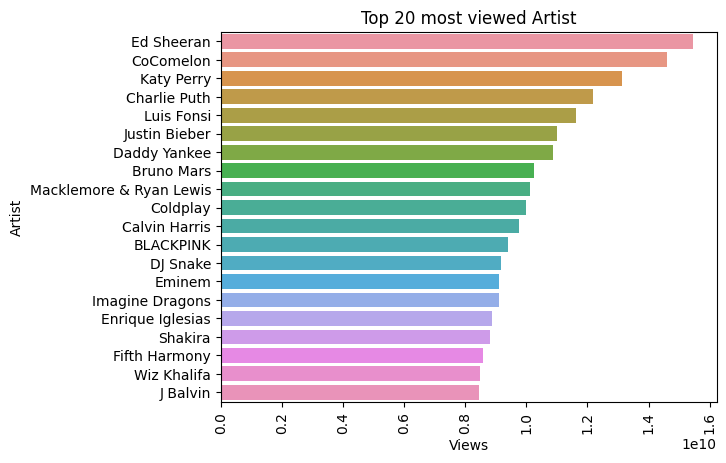

In [26]:
sns.barplot(twenty_more_views, x = "Views", y = "Artist")
plt.xticks(rotation = 90)
plt.title("Top 20 most viewed Artist")

plt.show()

Ed Sheeran est l'artiste le plus regardé / écouté. Macklemore & CoComelon et Katy Perry sont les deuxième et troisième artistes.

Ces chiffres montrent la puissance du streaming et des écoutes, qui participent des nos jours à la renommée d'un artiste.

#### Par likes

In [27]:
# Groupement par artistes les plus likés
twenty_more_likes = music.groupby("Artist")["Likes"].agg("sum").reset_index().sort_values("Likes", ascending = False).head(20)
twenty_more_likes

,Artist,Likes
153,BTS,139403808.0
151,BLACKPINK,132302505.0
333,Charlie Puth,86336925.0
526,Ed Sheeran,83543319.0
927,Justin Bieber,78584348.0
202,Billie Eilish,73338537.0
777,Imagine Dragons,72274477.0
59,Alan Walker,67977702.0
418,DJ Snake,67775831.0
1149,Luis Fonsi,66908489.0


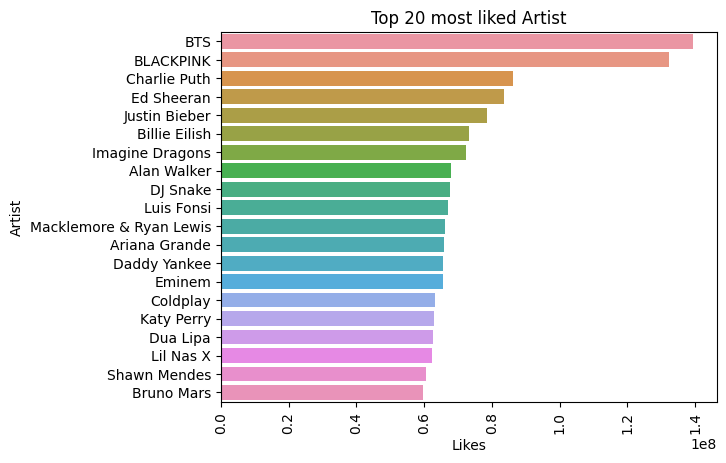

In [28]:
# Graphique
sns.barplot(twenty_more_likes, x = "Likes", y = "Artist")
plt.xticks(rotation = 90)
plt.title("Top 20 most liked Artist")

plt.show()

Le groupe de K-pop BTS est l'artiste le plus liké avec 140 millions de likes, suivi de Blackpink en deuxième position (130 millions) et de Charlie Puth (86 millions de likes). 

#### Par streams

In [29]:
twenty_more_stream = music.groupby("Artist")["Stream"].agg("sum").reset_index().sort_values("Stream", ascending = False).head(20)
twenty_more_stream

,Artist,Stream
1497,Post Malone,1.525126e+10
526,Ed Sheeran,1.439488e+10
507,Dua Lipa,1.340808e+10
2000,XXXTENTACION,1.322435e+10
1861,The Weeknd,1.303197e+10
927,Justin Bieber,1.209777e+10
777,Imagine Dragons,1.185831e+10
381,Coldplay,1.177848e+10
982,Khalid,1.138684e+10
267,Bruno Mars,1.089786e+10


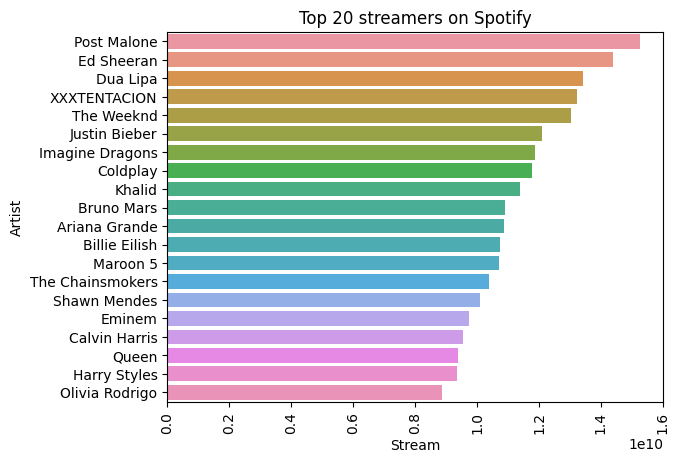

In [30]:
# Graphique

sns.barplot(twenty_more_stream, y = "Artist", x = "Stream")
plt.xticks(rotation = 90)
plt.title("Top 20 streamers on Spotify")

plt.show()

Post Malone est premier avec 1,52 milliard de streams et en deuxième position.

Ed Sheeran avec 1,43 milliard de streams est 2ème.

Dua Lipa complète le podium avec 1,34 millards de streams.

#### Par commentaires

In [31]:
twenty_more_comments = music.groupby("Artist")["Comments"].agg("sum").reset_index().sort_values("Comments", ascending = False).head(20)
twenty_more_comments

,Artist,Comments
153,BTS,39542659.0
151,BLACKPINK,19605027.0
1754,Stray Kids,8458365.0
1783,TWICE,8384985.0
1436,PSY,7311608.0
927,Justin Bieber,7259120.0
519,EXO,6981950.0
727,Halsey,6981661.0
1416,One Direction,6360892.0
1149,Luis Fonsi,4703428.0


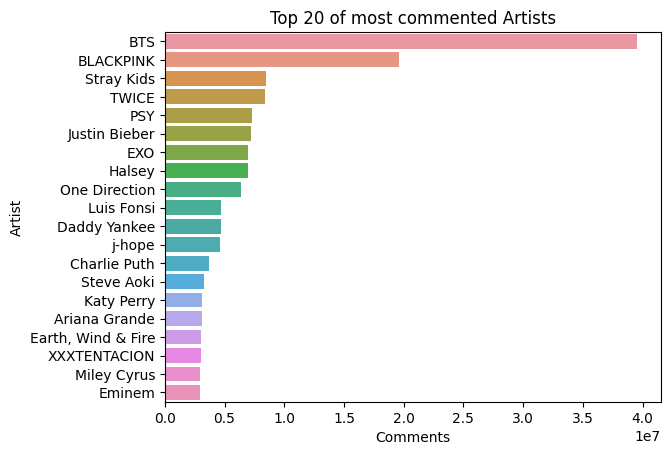

In [32]:
# Graphique

sns.barplot(twenty_more_comments, x = "Comments", y = "Artist")

plt.title("Top 20 of most commented Artists")

plt.show()

1er BTS (39 millions de commentaires), 2ème Blackpoink (20 millions), 3ème Stray Kids (8,5 milllions).

#### Top 20 des artistes les plus vus et streamés

In [33]:
views_streams = music.groupby("Artist").agg({"Views" : "sum", "Stream" : "sum"}).reset_index().sort_values(["Views", "Stream"], ascending = False).head(20)
views_streams

,Artist,Views,Stream
526,Ed Sheeran,1.546021e+10,1.439488e+10
374,CoComelon,1.460167e+10,3.690822e+08
955,Katy Perry,1.312063e+10,6.607329e+09
333,Charlie Puth,1.216759e+10,7.041187e+09
1149,Luis Fonsi,1.162811e+10,5.054326e+09
927,Justin Bieber,1.099106e+10,1.209777e+10
422,Daddy Yankee,1.087193e+10,5.135462e+09
267,Bruno Mars,1.024092e+10,1.089786e+10
1184,Macklemore & Ryan Lewis,1.012206e+10,3.982978e+09
381,Coldplay,9.997278e+09,1.177848e+10


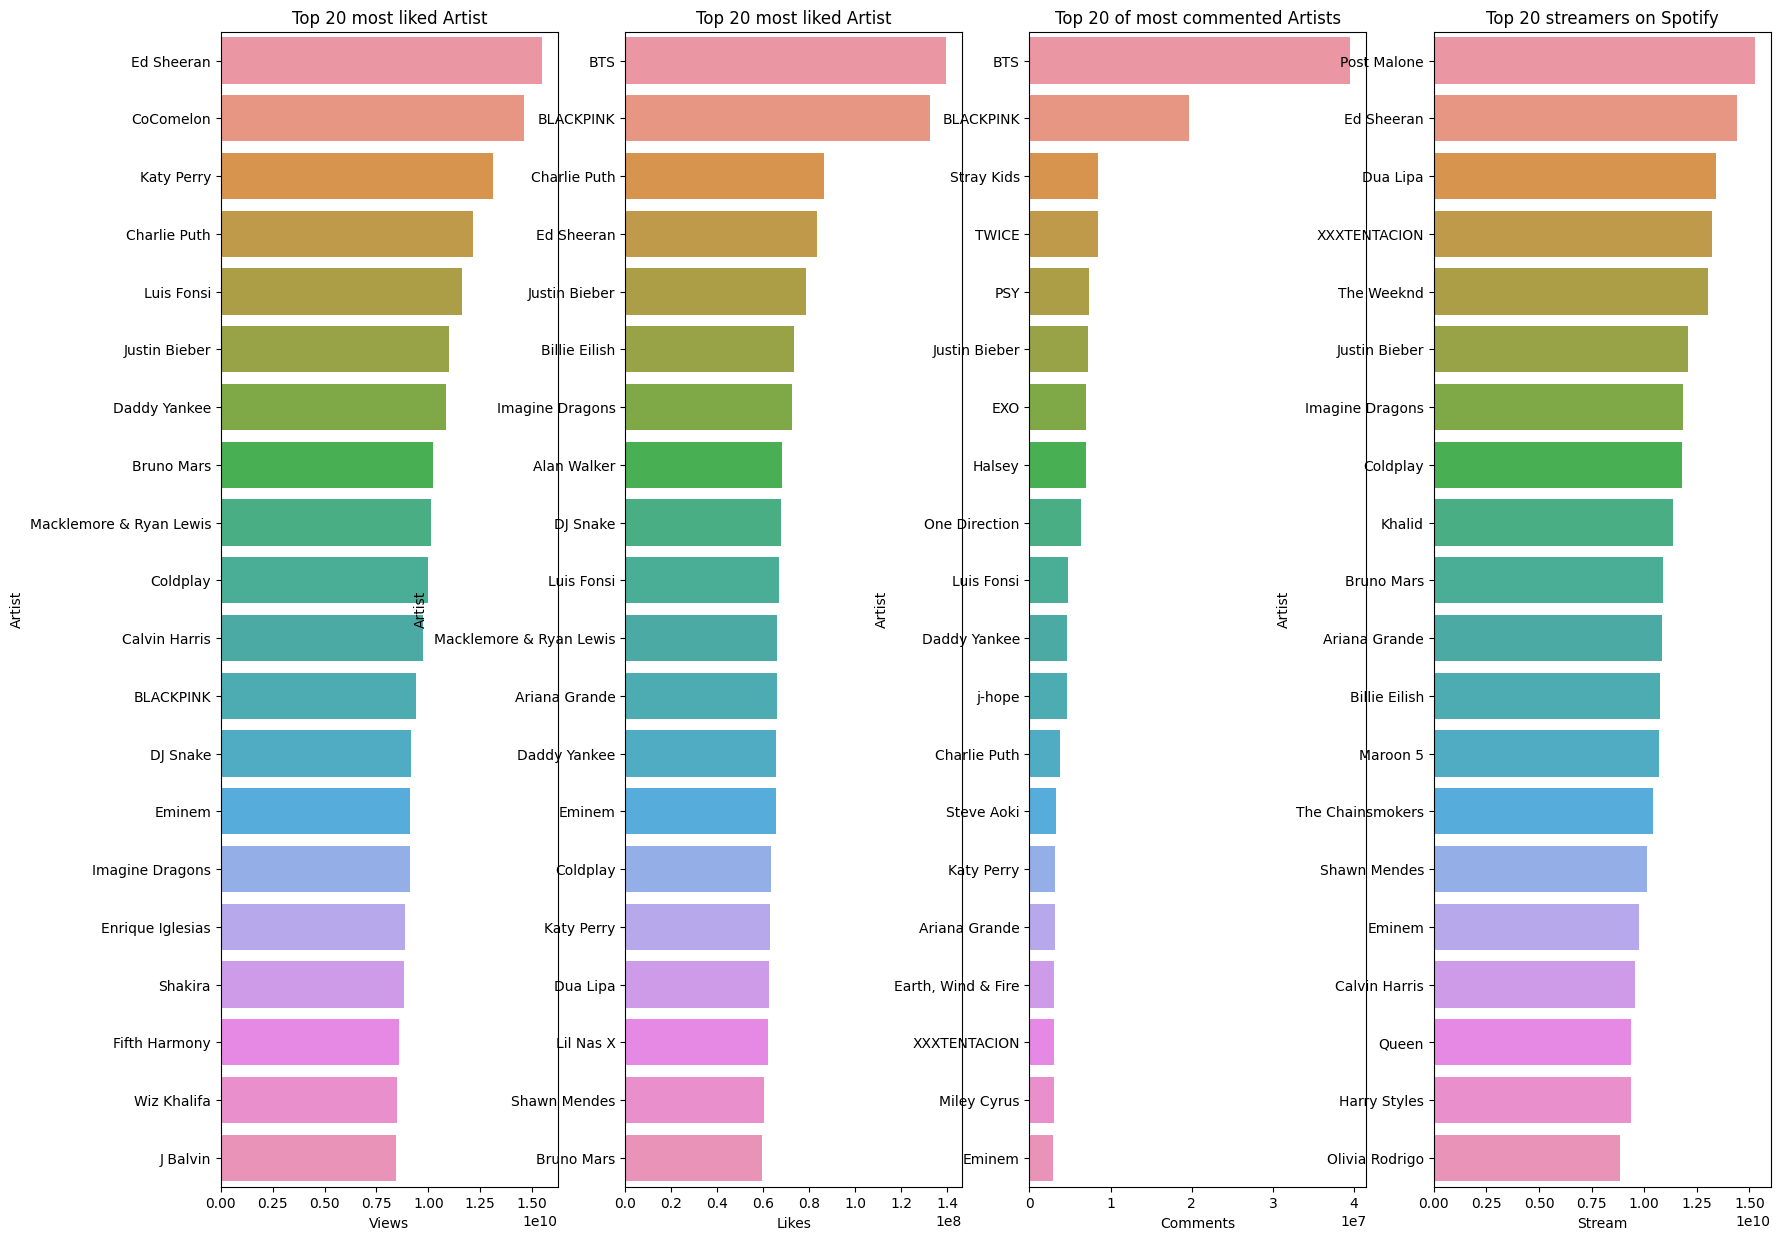

In [34]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 15))

sns.barplot(twenty_more_views, x = "Views", y = "Artist", ax = axs[0])
axs[0].set_title("Top 20 most liked Artist")

sns.barplot(twenty_more_likes, x = "Likes", y = "Artist", ax = axs[1])
axs[1].set_title("Top 20 most liked Artist")

sns.barplot(twenty_more_comments, x = "Comments", y = "Artist", ax = axs[2])
axs[2].set_title("Top 20 of most commented Artists")

sns.barplot(twenty_more_stream, y = "Artist", x = "Stream", ax = axs[3])
axs[3].set_title("Top 20 streamers on Spotify")

plt.show()

### Top 20 des vues, commentaires, likes et streams par piste sur YouTube et Spotify

#### Par vues

In [35]:
track_views = music.groupby("Track").agg({"Views" : "sum", "Comments" : "sum", "Likes" : "sum"}).reset_index().sort_values("Views", ascending = False).head(20)
track_views

,Track,Views,Comments,Likes
3713,Despacito,1.615930e+10,8505582.0,101577278.0
12997,See You Again (feat. Charlie Puth),1.154760e+10,4254691.0,80295292.0
8332,Lean On,9.974505e+09,1350509.0,48633206.0
13160,Shape of You,5.908398e+09,1130327.0,31047780.0
2489,Calma - Remix,5.322011e+09,730878.0,25649519.0
15249,This Is What You Came For,5.252060e+09,628534.0,21207312.0
14190,Swalla (feat. Nicki Minaj & Ty Dolla $ign),5.162404e+09,759525.0,28864162.0
16666,Wheels on the Bus,4.898831e+09,0.0,14396841.0
14413,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",4.828403e+09,1105938.0,37552053.0
16004,Uptown Funk (feat. Bruno Mars),4.821016e+09,598916.0,20067879.0


C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figu

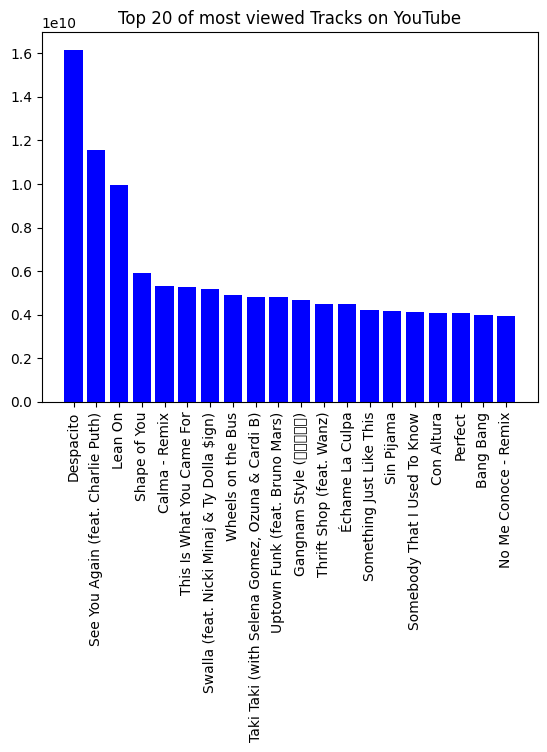

In [36]:
plt.bar(track_views["Track"], track_views["Views"], color = "blue")
plt.title("Top 20 of most viewed Tracks on YouTube")
plt.xticks(rotation = 90)

plt.show()

#### Par commentaires

In [37]:
track_comments = music.groupby("Track").agg({"Views" : "sum", "Comments" : "sum", "Likes" : "sum"}).reset_index().sort_values("Comments", ascending = False).head(20)
track_comments

,Track,Views,Comments,Likes
4200,Dynamite,1.841059e+09,16138145.0,36609928.0
2153,Boy With Luv (feat. Halsey),3.268220e+09,13071440.0,55176413.0
2333,Butter,8.503297e+08,9131761.0,22723127.0
3713,Despacito,1.615930e+10,8505582.0,101577278.0
5449,Gangnam Style (강남스타일),4.679767e+09,5331537.0,26399133.0
6513,How You Like That,1.182611e+09,5130725.0,24290306.0
1445,Baby,2.978567e+09,4817531.0,23752800.0
12997,See You Again (feat. Charlie Puth),1.154760e+10,4254691.0,80295292.0
11556,Pink Venom,5.306304e+08,3637659.0,14969274.0
11470,Permission to Dance,5.632219e+08,3486944.0,17090534.0


C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figu

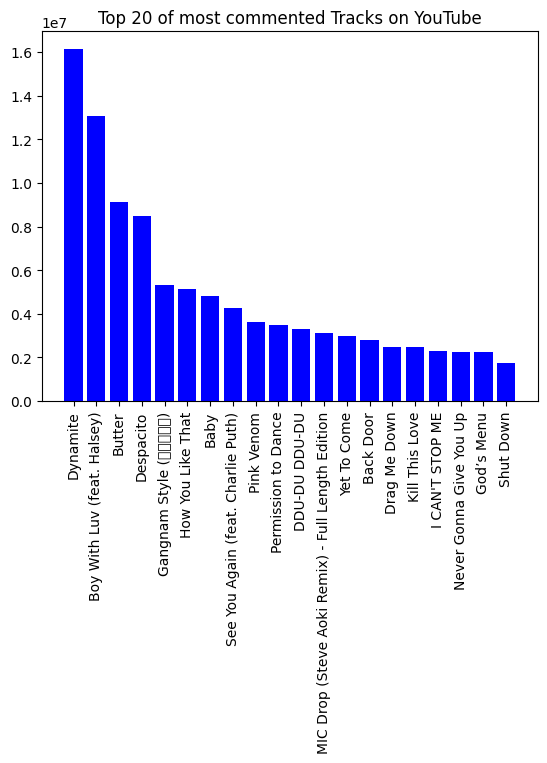

In [38]:
plt.bar(track_comments["Track"], track_comments["Comments"], color = "blue")
plt.title("Top 20 of most commented Tracks on YouTube")
plt.xticks(rotation = 90)

plt.show()

Avec près de 2 milliards de commentaires, Dynamite est placé en 1ère position, suivi par Boy With Luv.

#### Par likes

In [39]:
track_likes = music.groupby("Track").agg({"Views" : "sum", "Comments" : "sum", "Likes" : "sum"}).reset_index().sort_values("Likes", ascending = False).head(20)
track_likes

,Track,Views,Comments,Likes
3713,Despacito,1.615930e+10,8505582.0,101577278.0
12997,See You Again (feat. Charlie Puth),1.154760e+10,4254691.0,80295292.0
2153,Boy With Luv (feat. Halsey),3.268220e+09,13071440.0,55176413.0
17549,lovely (with Khalid),3.442783e+09,1123815.0,48852042.0
8332,Lean On,9.974505e+09,1350509.0,48633206.0
13132,Señorita,2.975300e+09,1280640.0,39692236.0
10871,Old Town Road - Remix,2.406592e+09,950696.0,37889373.0
14413,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",4.828403e+09,1105938.0,37552053.0
4200,Dynamite,1.841059e+09,16138145.0,36609928.0
13160,Shape of You,5.908398e+09,1130327.0,31047780.0


C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figu

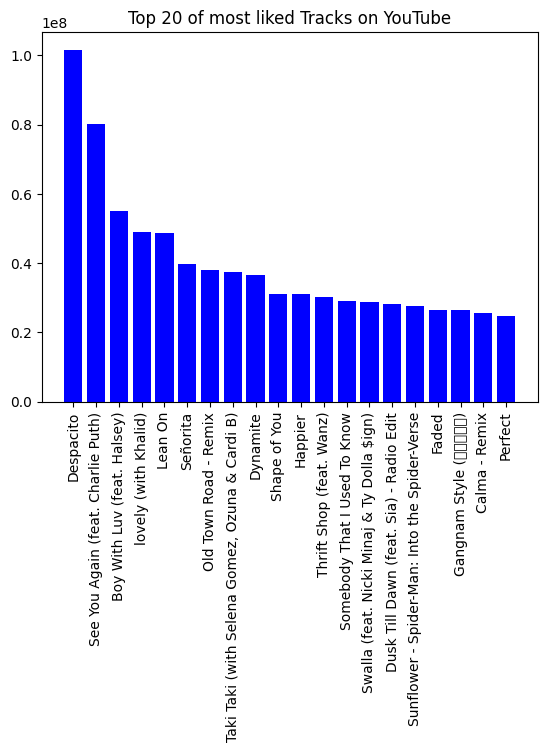

In [40]:
plt.bar(track_likes["Track"], track_likes["Likes"], color = "blue")
plt.title("Top 20 of most liked Tracks on YouTube")
plt.xticks(rotation = 90)

plt.show()

Despacito est le morceau le plus liké.

#### Par streams

In [41]:
track_stream = music.groupby("Track").agg({"Stream" : "sum"}).reset_index().sort_values("Stream", ascending = False).head(20)
track_stream

,Track,Stream
2908,Closer,5.465365e+09
2542,Can't Hold Us (feat. Ray Dalton),5.225629e+09
14107,Sunflower - Spider-Man: Into the Spider-Verse,5.076660e+09
5977,Happier,4.757615e+09
12709,STAY (with Justin Bieber),4.731555e+09
13132,Señorita,4.672440e+09
14976,The Middle,4.566883e+09
4254,Eastside (with Halsey & Khalid),4.274888e+09
17549,lovely (with Khalid),4.221148e+09
4556,Enemy (with JID) - from the series Arcane Leag...,4.182328e+09


In [42]:
views_stream = music.groupby("Track").agg({"Views" : "sum", "Stream" : "sum"}).reset_index().sort_values("Stream", ascending = False).head(20)
views_stream

,Track,Views,Stream
2908,Closer,1.032684e+09,5.465365e+09
2542,Can't Hold Us (feat. Ray Dalton),3.036616e+09,5.225629e+09
14107,Sunflower - Spider-Man: Into the Spider-Verse,3.954778e+09,5.076660e+09
5977,Happier,2.494990e+09,4.757615e+09
12709,STAY (with Justin Bieber),1.362417e+09,4.731555e+09
13132,Señorita,2.975300e+09,4.672440e+09
14976,The Middle,4.667426e+08,4.566883e+09
4254,Eastside (with Halsey & Khalid),1.269443e+09,4.274888e+09
17549,lovely (with Khalid),3.442783e+09,4.221148e+09
4556,Enemy (with JID) - from the series Arcane Leag...,1.185281e+09,4.182328e+09


1er constat : les pistes les plus vues sur YouTube ne sont pas forcément celles les plus écoutées sur Spotify. Pourquoi ?
- les cibles visées par chaque plateforme est différente ;
- les algorithmes différents : un morceau mis en avant sur YT ne le sera pas forcément sur Spotify (et inversement) ;
- la mise en avant par les artistes eux mêmes et les maisons de disques.
    


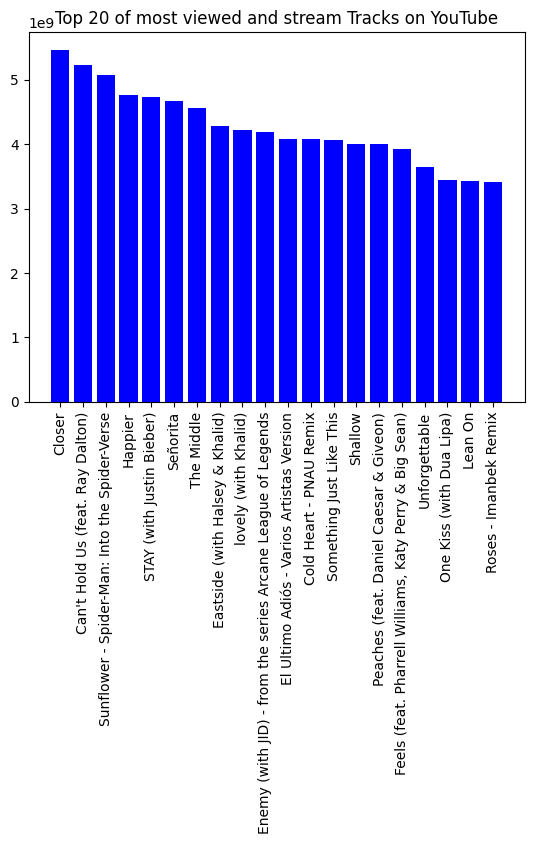

In [43]:
plt.bar(views_stream["Track"], views_stream["Stream"], color = "blue")
plt.title("Top 20 of most viewed and stream Tracks on YouTube")
plt.xticks(rotation = 90)

plt.show()

C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figu

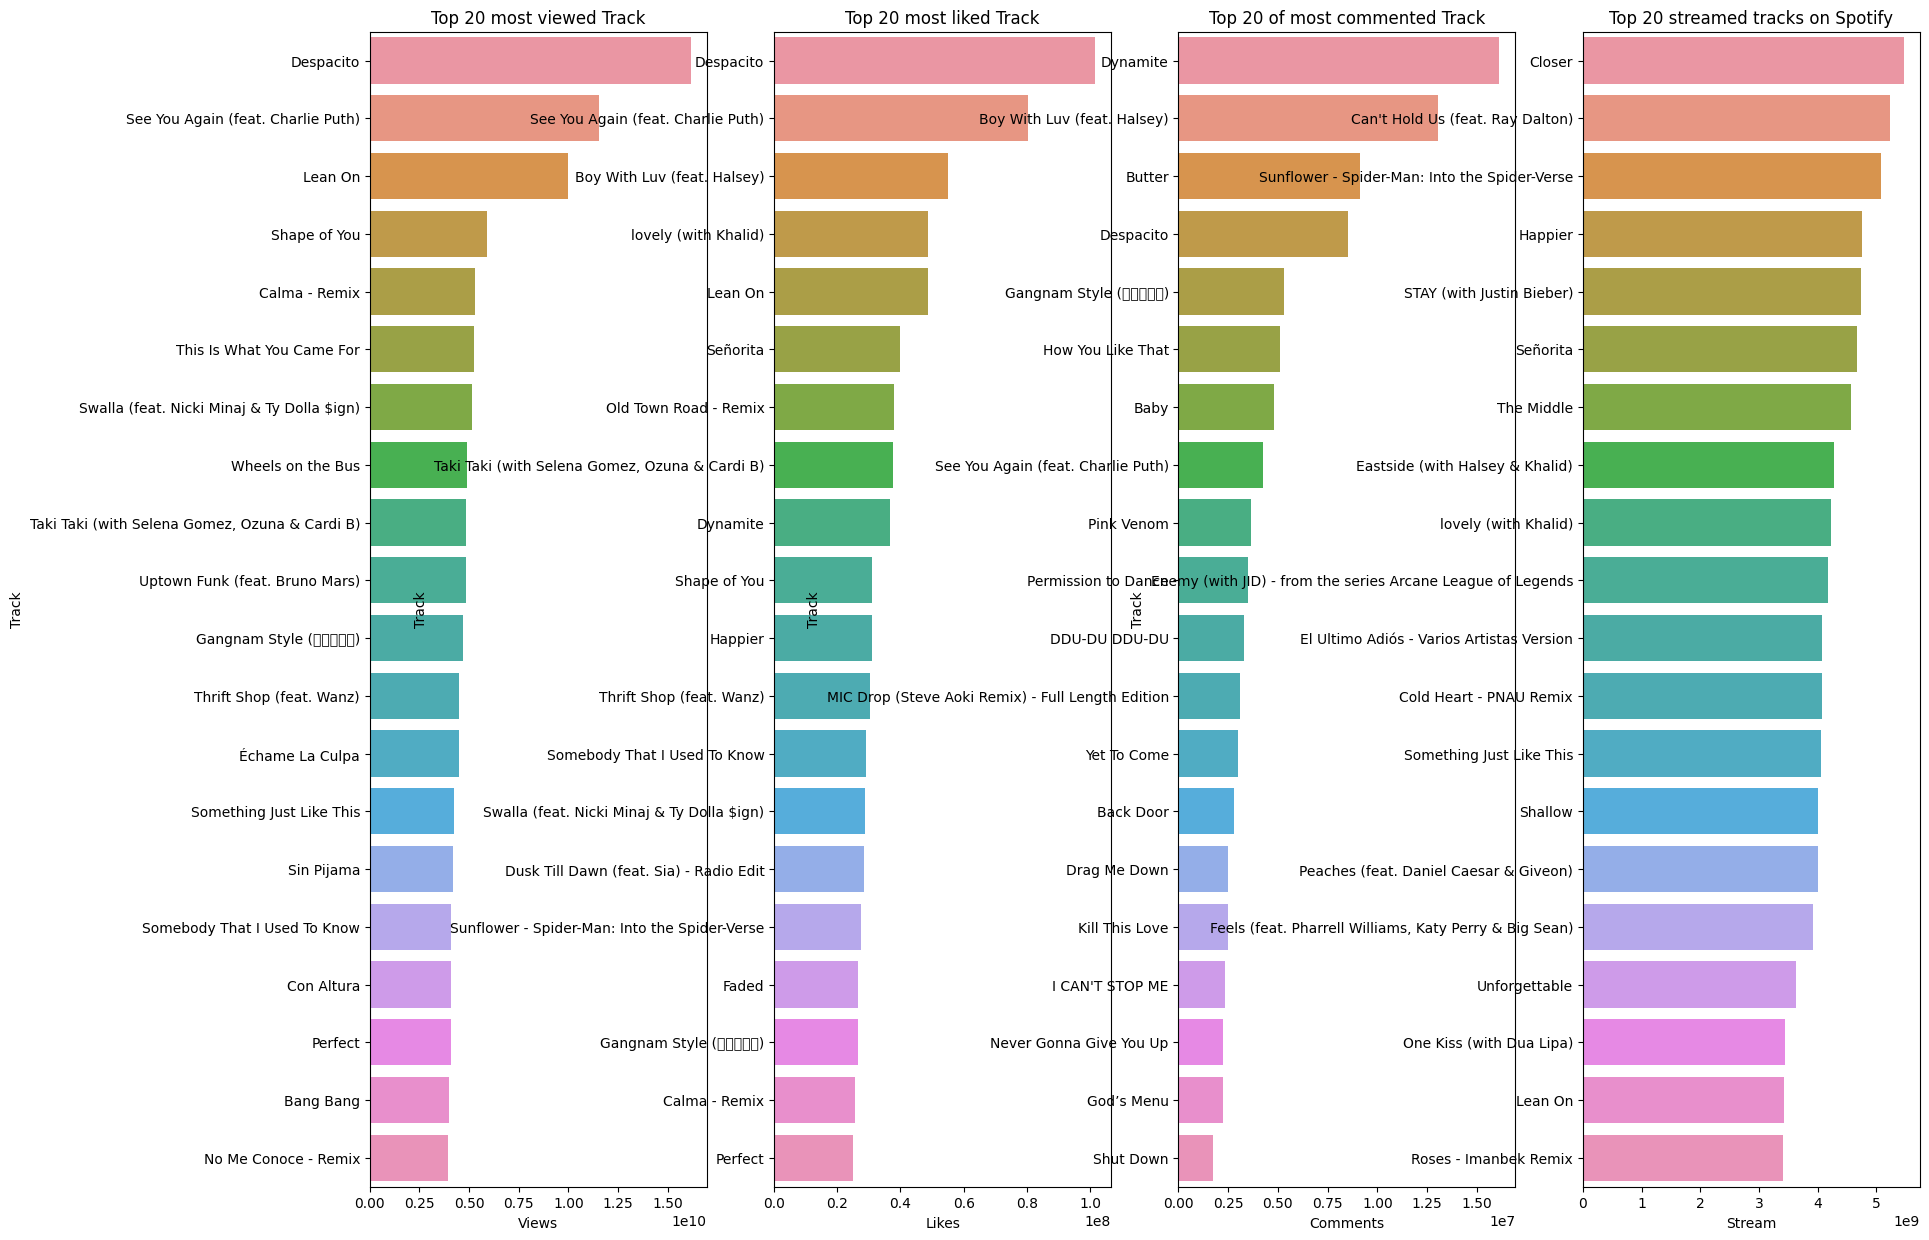

In [44]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 15))

sns.barplot(track_views, x = "Views", y = "Track", ax = axs[0])
axs[0].set_title("Top 20 most viewed Track")

sns.barplot(track_likes, x = "Likes", y = "Track", ax = axs[1])
axs[1].set_title("Top 20 most liked Track")

sns.barplot(track_comments, x = "Comments", y = "Track", ax = axs[2])
axs[2].set_title("Top 20 of most commented Track")

sns.barplot(views_stream, y = "Track", x = "Stream", ax = axs[3])
axs[3].set_title("Top 20 streamed tracks on Spotify")

plt.show()

#### Pistes avec les mesures

In [45]:
top_20_likes_measures = music.sort_values('Likes', ascending = False).head(20)
top_20_likes_measures[['Track', 'Energy', 'Danceability', 'Acousticness']]
top_20_likes_measures.drop_duplicates(subset = "Track", keep = 'first', inplace = True)
top_20_likes_measures

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.19800,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09
14580,Charlie Puth,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,0.36900,...,229526.0,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5.773798e+09,40147674.0,2127346.0,Download the new Furious 7 Soundtrack Deluxe V...,True,True,1.521255e+09
14561,BTS,Dynamite,BE,album,0.746,0.765,6.0,-4.410,0.0993,0.01120,...,199054.0,BTS (방탄소년단) 'Dynamite' Official MV,HYBE LABELS,1.640946e+09,35892575.0,16083138.0,BTS (방탄소년단) 'Dynamite' Official MV\n\n\nCredit...,True,True,1.582446e+09
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1.0,-3.183,0.0802,0.58100,...,233713.0,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5.908398e+09,31047780.0,1130327.0,The official music video for Ed Sheeran - Shap...,True,True,3.362005e+09
16030,Halsey,Boy With Luv (feat. Halsey),MAP OF THE SOUL : PERSONA,album,0.645,0.862,11.0,-4.761,0.0845,0.09330,...,229773.0,BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat....,HYBE LABELS,1.634110e+09,27588224.0,6535719.0,BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (Feat....,True,True,9.894780e+08
16668,Alan Walker,Faded,Different World,album,0.468,0.627,6.0,-5.085,0.0476,0.02810,...,212107.0,Alan Walker - Faded,Alan Walker,3.400742e+09,26446178.0,1250054.0,Click the link to listen to my latest album: \...,True,True,1.683178e+09
8937,PSY,Gangnam Style (강남스타일),Gangnam Style (강남스타일),single,0.727,0.937,11.0,-2.871,0.2860,0.00417,...,219493.0,PSY - GANGNAM STYLE(강남스타일) M/V,officialpsy,4.679767e+09,26399133.0,5331537.0,PSY - ‘I LUV IT’ M/V @ https://youtu.be/Xvjnoa...,False,False,3.709911e+08
18568,Billie Eilish,lovely (with Khalid),lovely (with Khalid),single,0.351,0.296,4.0,-10.109,0.0333,0.93400,...,200186.0,"Billie Eilish, Khalid - lovely",BillieEilishVEVO,1.721401e+09,24426202.0,561906.0,Listen to “lovely” (with Khalid): http://smart...,True,True,2.110574e+09
17999,BLACKPINK,How You Like That,THE ALBUM,album,0.812,0.761,11.0,-5.222,0.0812,0.04650,...,182956.0,BLACKPINK - 'How You Like That' M/V,BLACKPINK,1.182611e+09,24290306.0,5130725.0,BLACKPINK - How You Like That\n\n보란 듯이 무너졌어\n바...,True,True,7.332138e+08
18001,BLACKPINK,Kill This Love,KILL THIS LOVE,single,0.763,0.835,2.0,-5.234,0.1910,0.32300,...,191050.0,BLACKPINK - 'Kill This Love' M/V,BLACKPINK,1.734794e+09,24061574.0,2466445.0,BLACKPINK - Kill This Love\n\n천사 같은 Hi 끝엔 악마 같...,True,True,6.617903e+08


### Les albums

#### Les types d'albums les plus populaires sur YouTube

In [46]:
album_type = music.groupby("Album_type").agg({"Views" : "sum"}).reset_index().sort_values("Views", ascending = False).head(20)
album_type

,Album_type,Views
0,album,1.438910e+12
2,single,4.019165e+11
1,compilation,6.122649e+10


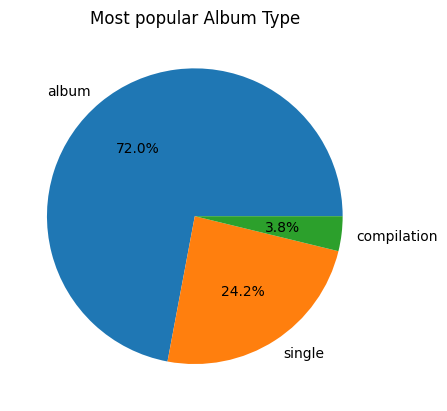

In [47]:
# Calculer les pourcentages pour chaque type d'album
album_type_counts = music['Album_type'].value_counts()
album_type_percentages = album_type_counts / album_type_counts.sum()

# Créer un camembert en utilisant les pourcentages calculés
plt.pie(album_type_percentages, labels=album_type_percentages.index, autopct='%1.1f%%')
plt.title("Most popular Album Type")

plt.show()

Le type d'album le plus populaire est 'album', qui représente pplus de 72 % du dataset.

Les singles représentent 24%, soit près d'1/4.

#### Top 10 des albums sous licence sur YouTube et Spotify

In [48]:
# Rappel
music.head(3)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.04250,...,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


In [49]:
licensed = music[music["Licensed"] == True]
licensed

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,...,94667.0,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,...,150857.0,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,...,136842.0,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,...,108387.0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [50]:
licensed_album = licensed["Album"].value_counts()[0:10]
licensed_album

Album
Greatest Hits                   22
Vida Cara                       19
HEROES & VILLAINS               19
Tchaikovsky: The Nutcracker     17
An Evening With Silk Sonic      17
Resistiré                       13
The Score (Expanded Edition)    13
The Heist                       13
IL CORAGGIO DEI BAMBINI         12
LITTLE LOVE                     12
Name: count, dtype: int64

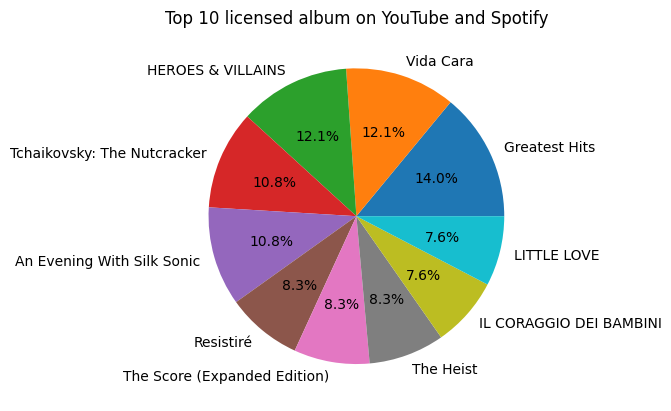

In [51]:
plt.pie(licensed_album, labels = licensed_album.index, autopct='%1.1f%%')
plt.title("Top 10 licensed album on YouTube and Spotify")

plt.show()

### Corrélations entre mesures

array([[<Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Loudness'}>],
       [<Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Liveness'}>],
       [<Axes: title={'center': 'Valence'}>,
        <Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Duration_ms'}>,
        <Axes: title={'center': 'Views'}>],
       [<Axes: title={'center': 'Likes'}>,
        <Axes: title={'center': 'Comments'}>,
        <Axes: title={'center': 'Stream'}>, <Axes: >]], dtype=object)

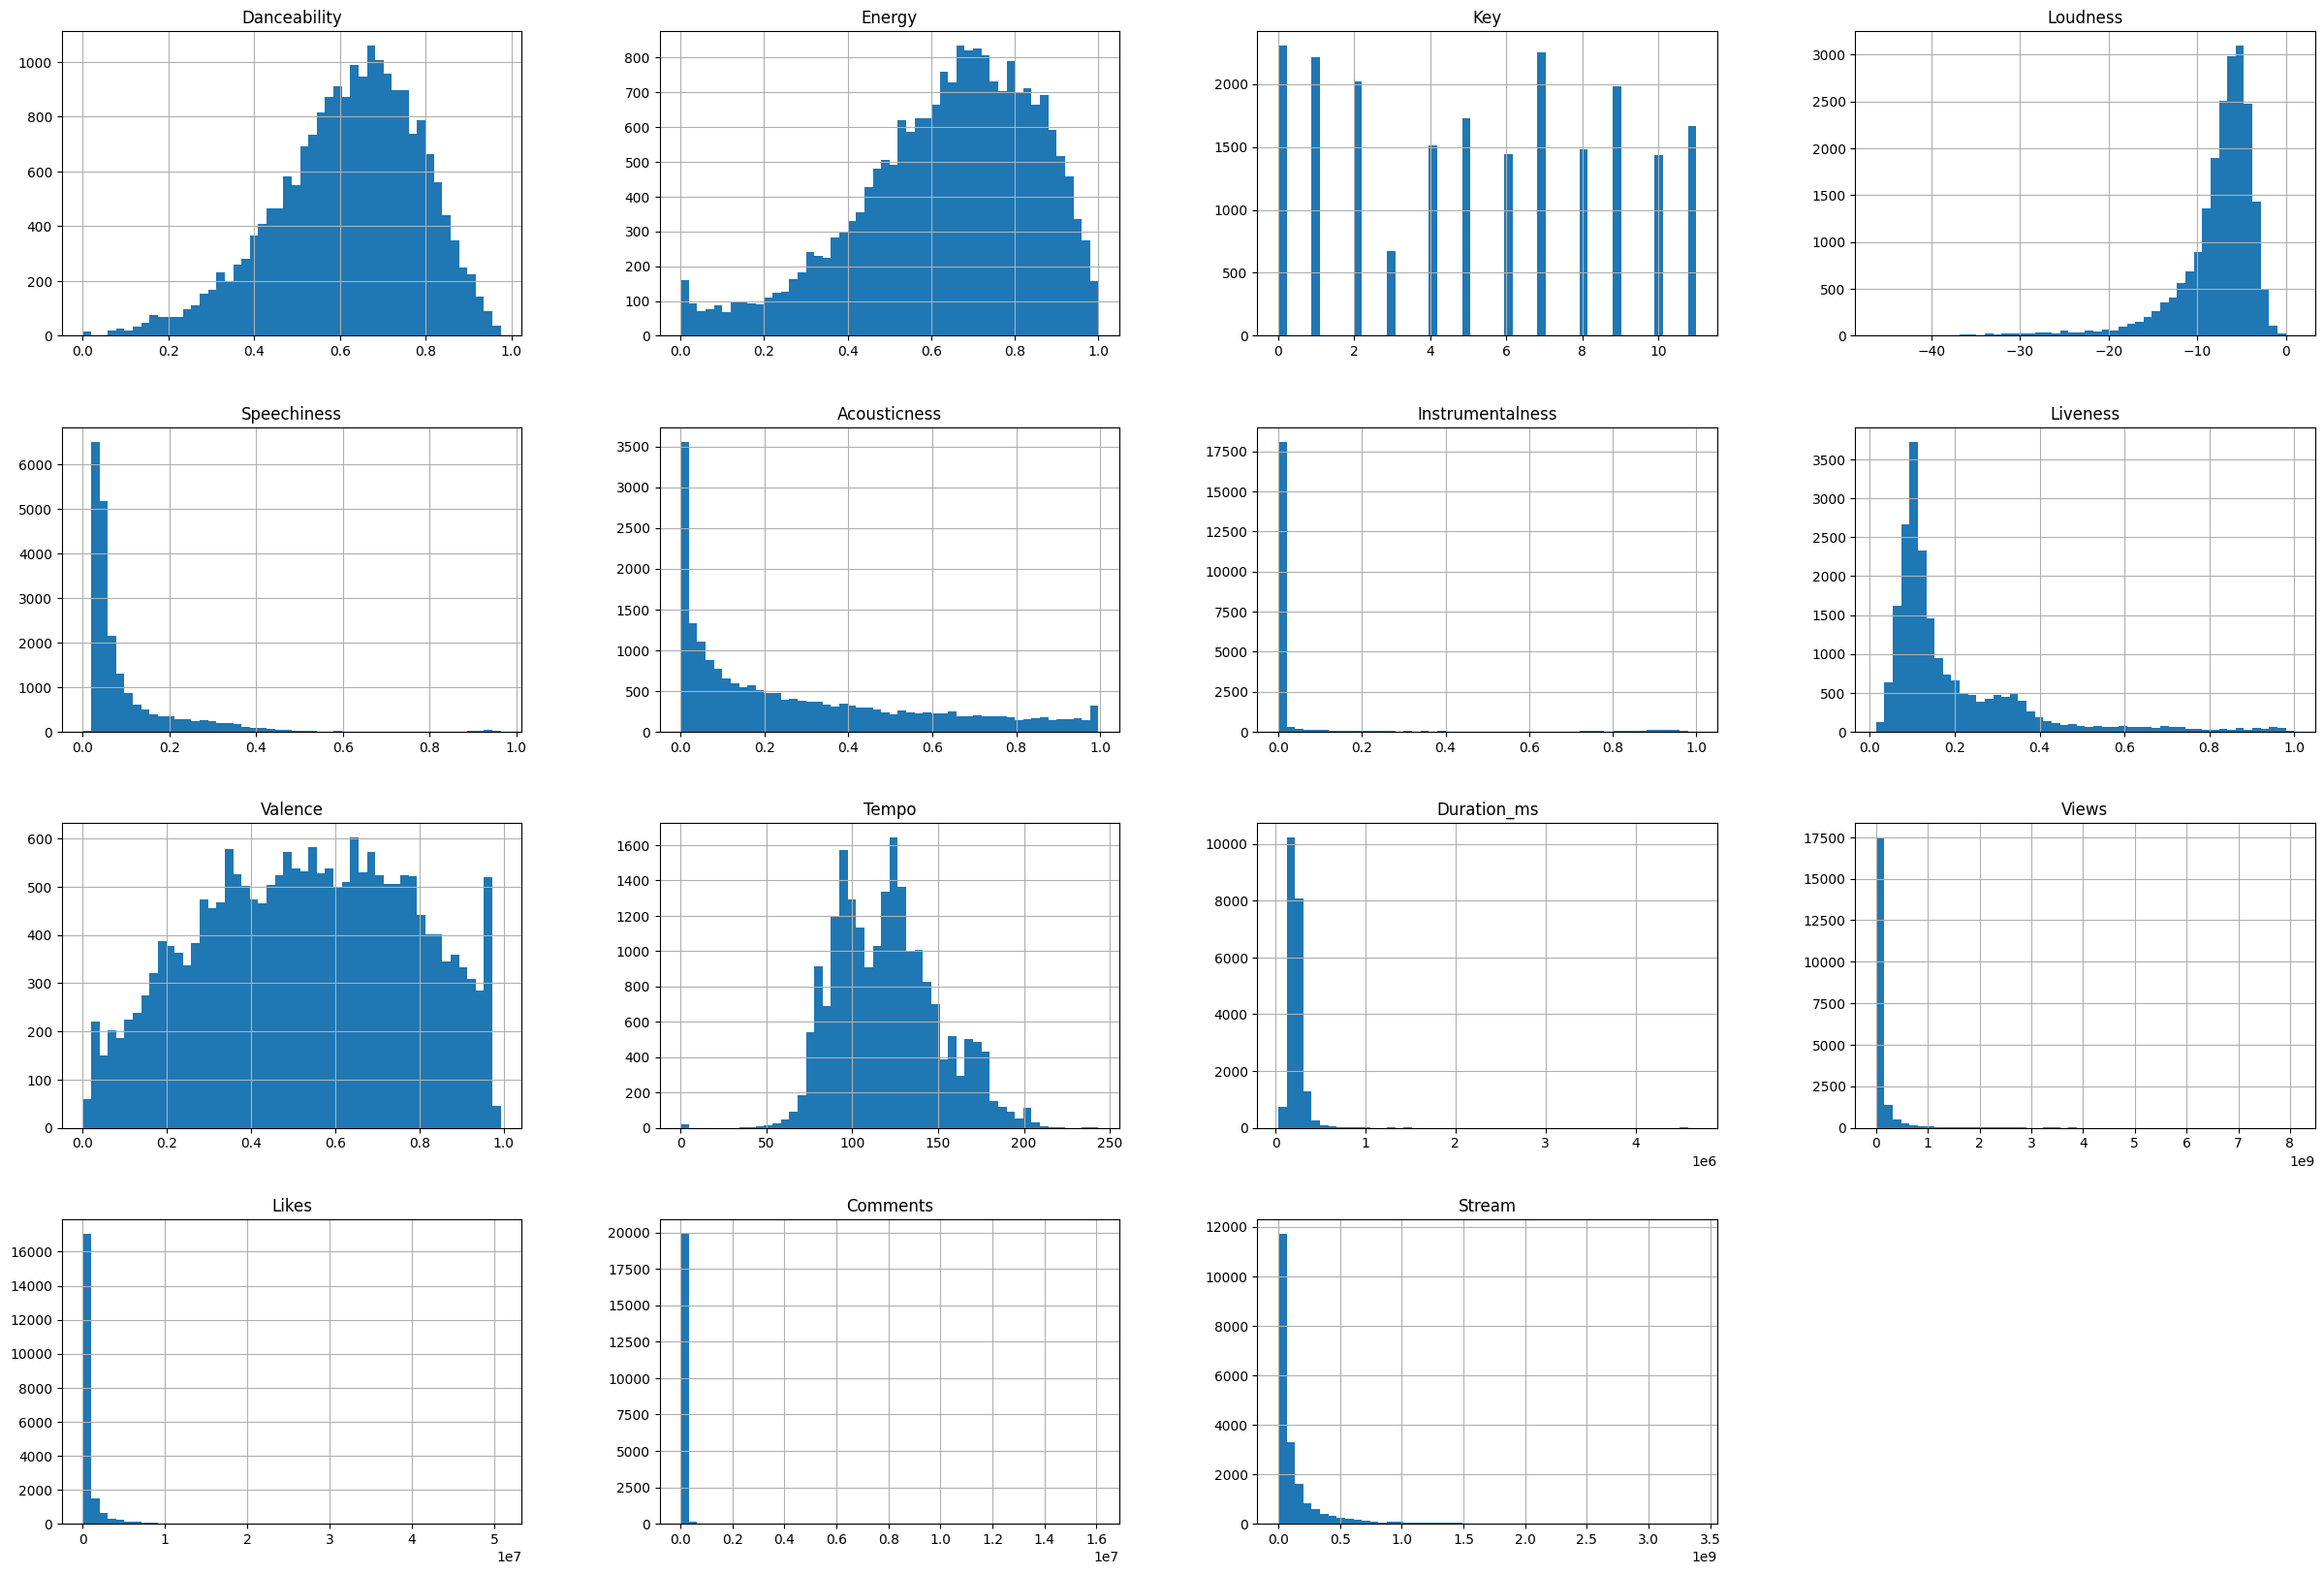

In [52]:
music.hist(bins = 50, figsize = (30,20))

In [53]:
music.dtypes

Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [54]:
# Exclure les colonnes non numériques pour la corrélation :

num_cols = music.select_dtypes(include=['float64', 'int64']).columns
music_num = music[num_cols]
music_num

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06


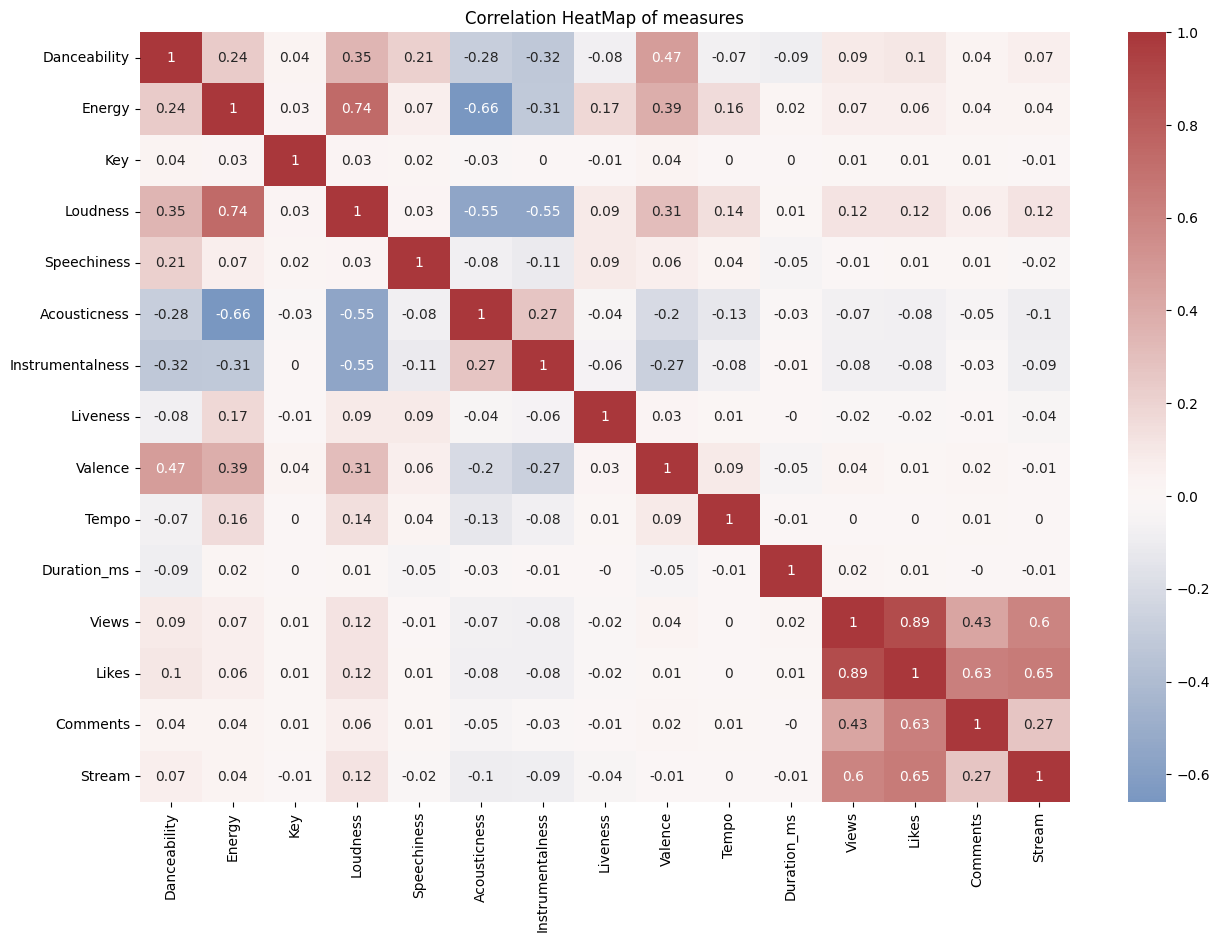

In [55]:
plt.figure(figsize = (15, 10))
sns.heatmap(round(music_num.corr(), 2), annot = True, cmap = "vlag", center = 0)
plt.title("Correlation HeatMap of measures")

plt.show()

Les corrélations sont plus ou moins fortes selon les mesures.

### Top 20 des albums les plus visionnés, likés et commentés et streamés sur YouTube et Spotify

#### Par vues

In [56]:
album_views = music.groupby("Album").agg({"Views" : "sum"}).reset_index().sort_values("Views", ascending = False).head(20)
album_views

,Album,Views
10921,VIDA,2.114088e+10
8761,See You Again (feat. Charlie Puth),1.154760e+10
10062,The Heist,1.124059e+10
7614,Peace Is The Mission (Extended),1.063446e+10
2114,"CoComelon Kids Hits, Vol. 1",1.051820e+10
11872,÷ (Deluxe),9.666639e+09
7451,PRISM,7.820546e+09
11278,What Is Love? (Deluxe Edition),7.378171e+09
6086,MALA SANTA,6.421337e+09
8000,Purpose (Deluxe),5.846258e+09


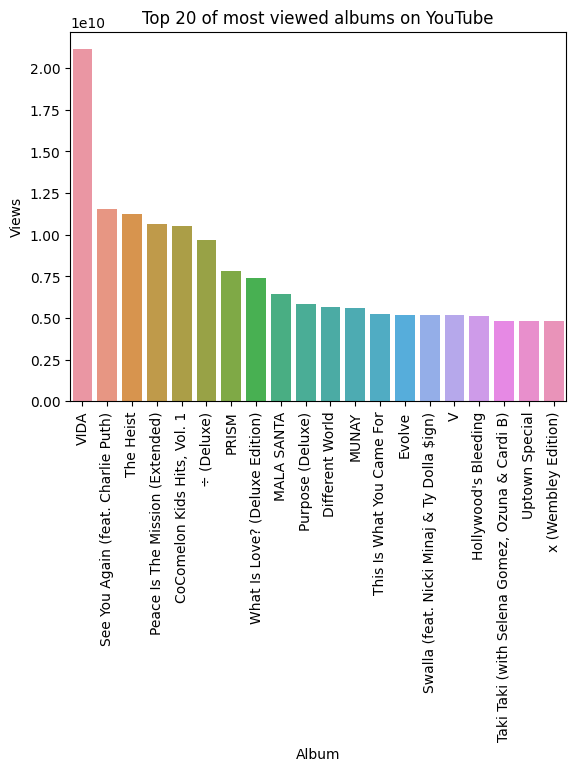

In [57]:
sns.barplot(album_views, y = 'Views', x = 'Album')
plt.title("Top 20 of most viewed albums on YouTube")
plt.xticks(rotation = 90)
plt.show()

#### Par likes

In [58]:
album_likes = music.groupby("Album").agg({"Likes" : "sum"}).reset_index().sort_values("Likes", ascending = False).head(20)
album_likes

,Album,Likes
10921,VIDA,123922855.0
8761,See You Again (feat. Charlie Puth),80295292.0
10062,The Heist,74964220.0
6092,MAP OF THE SOUL : PERSONA,55176413.0
7614,Peace Is The Mission (Extended),53739750.0
11872,÷ (Deluxe),53093334.0
11772,lovely (with Khalid),48852042.0
2747,Different World,46444440.0
11278,What Is Love? (Deluxe Edition),43255756.0
258,7 EP,39698736.0


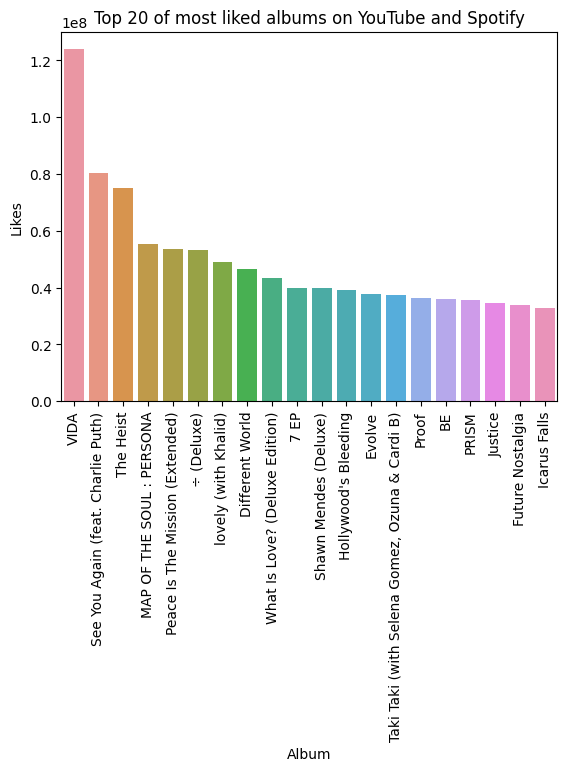

In [59]:
sns.barplot(album_likes, y = 'Likes', x = 'Album')
plt.title("Top 20 of most liked albums on YouTube and Spotify")
plt.xticks(rotation = 90)
plt.show()

Avec 123 millions de likes, VIDA est l'album le plus liké.

#### Par commentaires

In [60]:
album_comments = music.groupby("Album").agg({"Comments" : "sum"}).reset_index().sort_values("Comments", ascending = False).head(20)
album_comments

,Album,Comments
1064,BE,16083138.0
6092,MAP OF THE SOUL : PERSONA,13071440.0
7958,Proof,12221035.0
10921,VIDA,9221901.0
1080,BORN PINK,5400231.0
3945,Gangnam Style (강남스타일),5331537.0
9590,THE ALBUM,5130725.0
6780,My World 2.0,4805805.0
8761,See You Again (feat. Charlie Puth),4254691.0
7658,Permission to Dance,3486944.0


C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figu

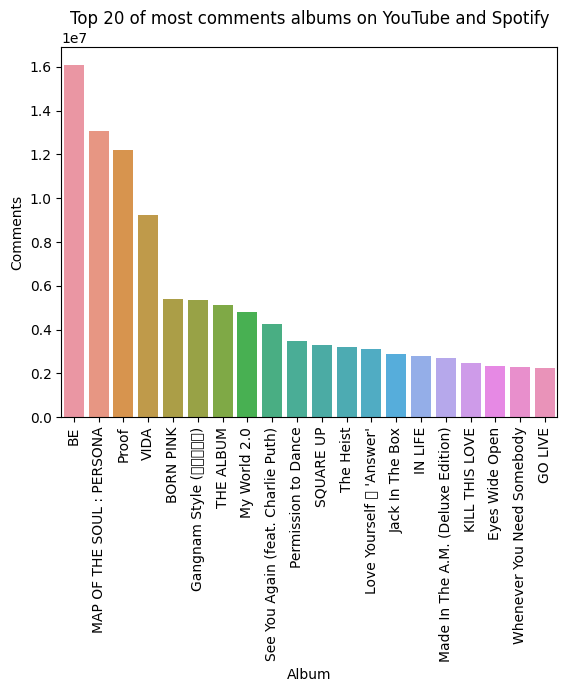

In [61]:
sns.barplot(album_comments, y = 'Comments', x = 'Album')
plt.title("Top 20 of most comments albums on YouTube and Spotify")
plt.xticks(rotation = 90)
plt.show()

BE est l'album le plus commenté, avec 16 millions de commentaires. 

A noter : l'album le plus liké, VIDA, n'arrive que quatrième.

#### Par streams

In [62]:
album_stream = music.groupby("Album").agg({"Stream" : "sum"}).reset_index().sort_values("Stream", ascending = False).head(20)
album_stream

,Album,Stream
10062,The Heist,9.712794e+09
10804,Un Verano Sin Ti,9.678625e+09
4544,Hollywood's Bleeding,9.492893e+09
8540,SOUR,8.325355e+09
3888,Future Nostalgia,7.379888e+09
11278,What Is Love? (Deluxe Edition),6.874167e+09
11872,÷ (Deluxe),6.835601e+09
10921,VIDA,6.634329e+09
5193,Justice,6.537341e+09
3480,F*CK LOVE 3+: OVER YOU,6.214954e+09


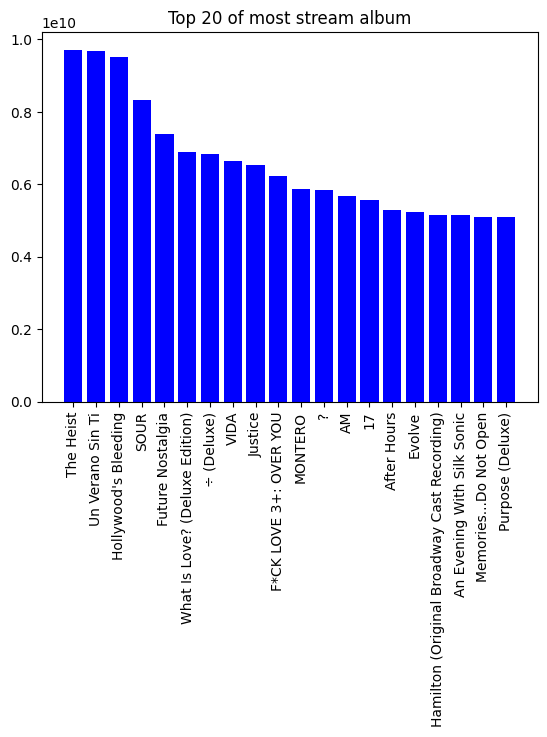

In [63]:
plt.bar(album_stream["Album"], album_stream["Stream"], color = "blue")
plt.title("Top 20 of most stream album")
plt.xticks(rotation = 90)

plt.show()

Encore une fois, les raisons pour lesquelles les albums les plus vus sur YouTube ne sont pas les plus populaires sur Spotify peut être dus à :
- le public cible différent ;
- les algorithmes différents sur ces deux plateformes ;
- la mise en avant des artistes eux-mêmes ainsi que par le smaisons de disques.

C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figu

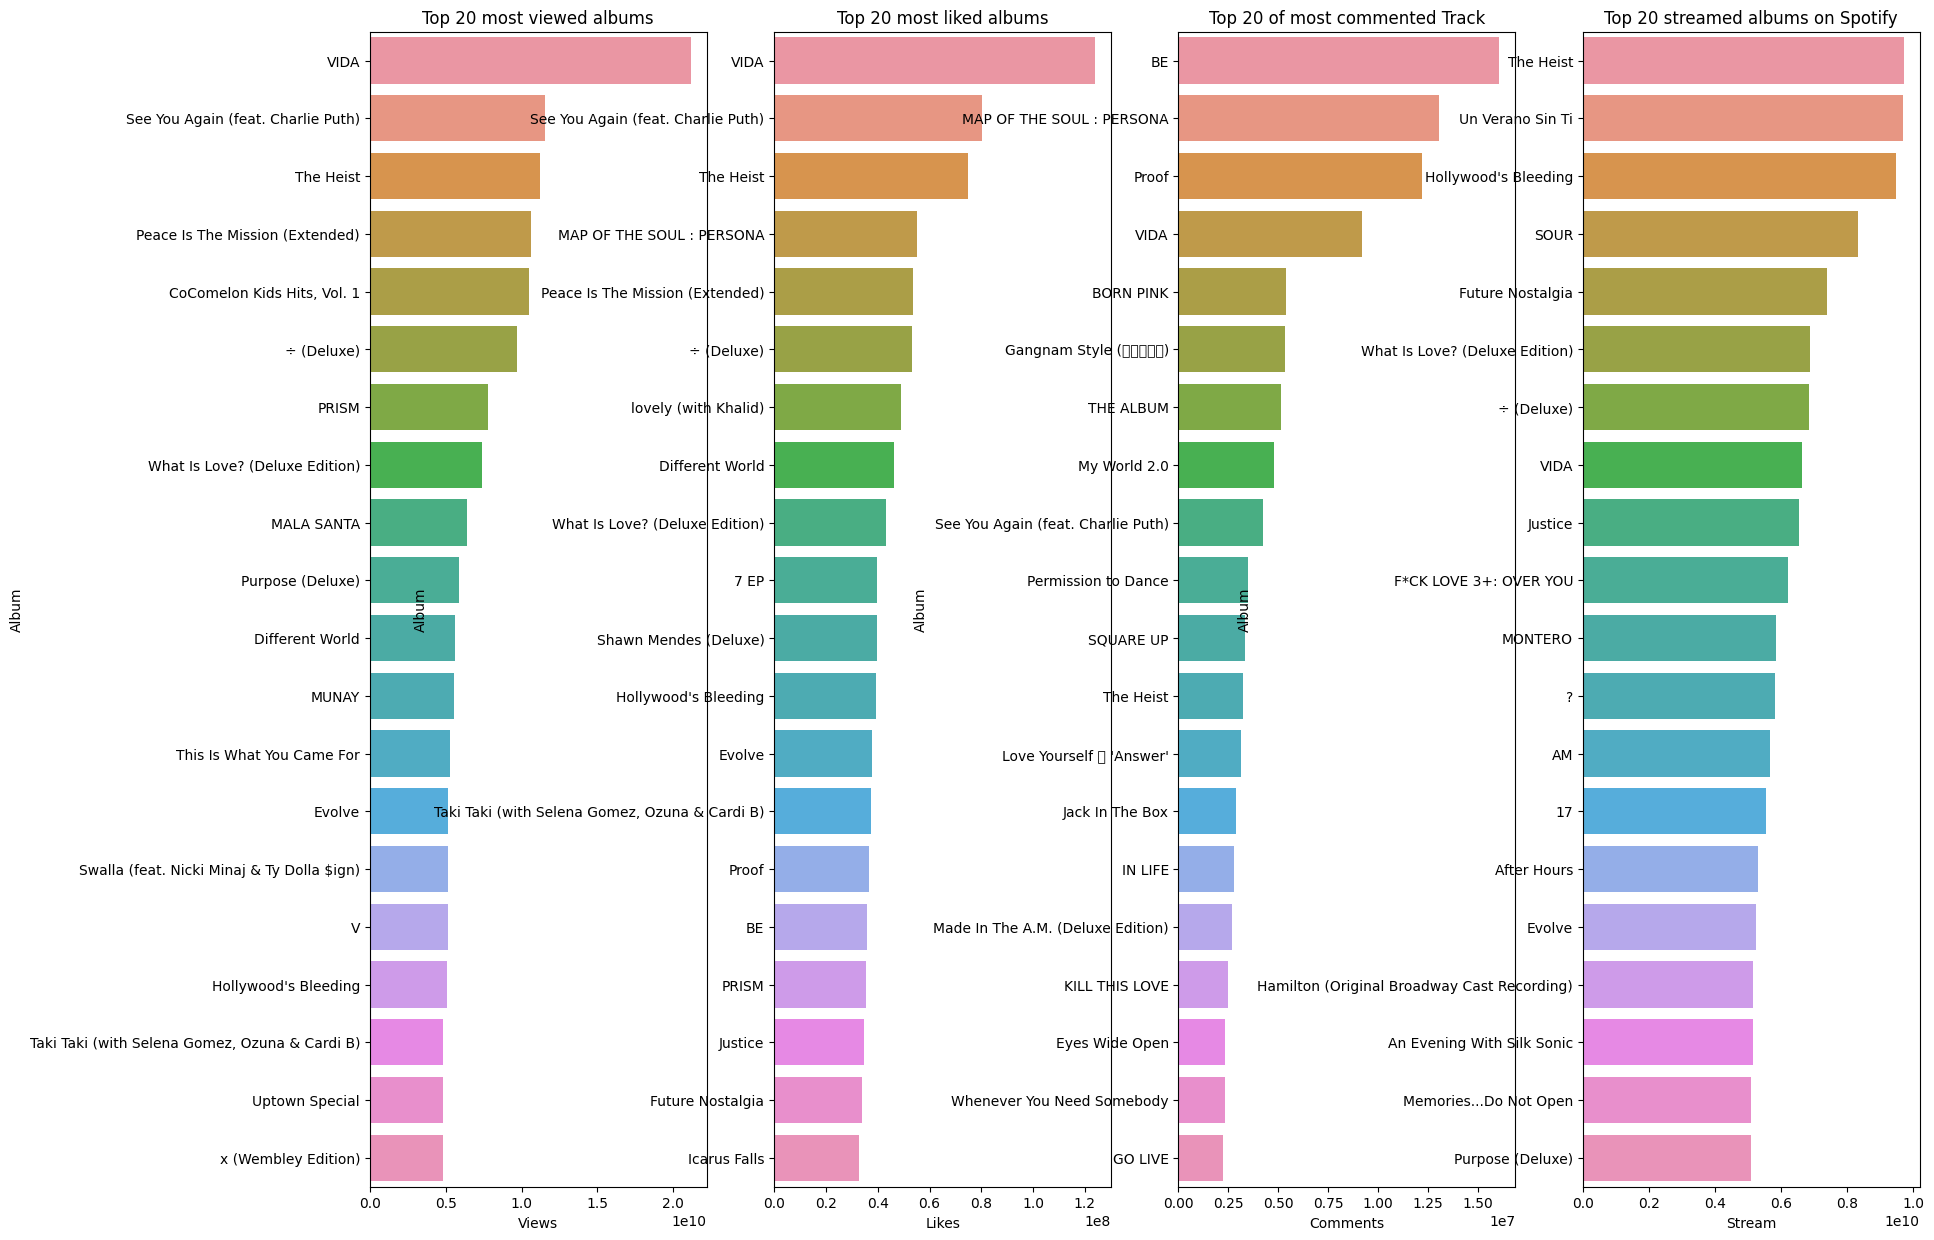

In [64]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 15))

sns.barplot(album_views, x = "Views", y = "Album", ax = axs[0])
axs[0].set_title("Top 20 most viewed albums")

sns.barplot(album_likes, x = "Likes", y = "Album", ax = axs[1])
axs[1].set_title("Top 20 most liked albums")

sns.barplot(album_comments, x = "Comments", y = "Album", ax = axs[2])
axs[2].set_title("Top 20 of most commented Track")

sns.barplot(album_stream, y = "Album", x = "Stream", ax = axs[3])
axs[3].set_title("Top 20 streamed albums on Spotify")

plt.show()

### Top 20 des chaînes les plus vues, commentées, likées et streamées

#### Par vues

In [65]:
channel_views = music.groupby("Channel").agg({"Views" : "sum"}).reset_index().sort_values("Views", ascending = False).head(20)
channel_views

,Channel,Views
4908,T-Series,4.796159e+10
3099,LuisFonsiVEVO,2.170252e+10
829,CalvinHarrisVEVO,1.828114e+10
3223,Macklemore,1.700341e+10
1491,Ed Sheeran,1.691822e+10
2092,Hear This Music,1.508851e+10
1021,Cocomelon - Nursery Rhymes,1.460167e+10
744,Bruno Mars,1.301357e+10
2665,KatyPerryVEVO,1.247680e+10
1168,DJSnakeVEVO,1.245510e+10


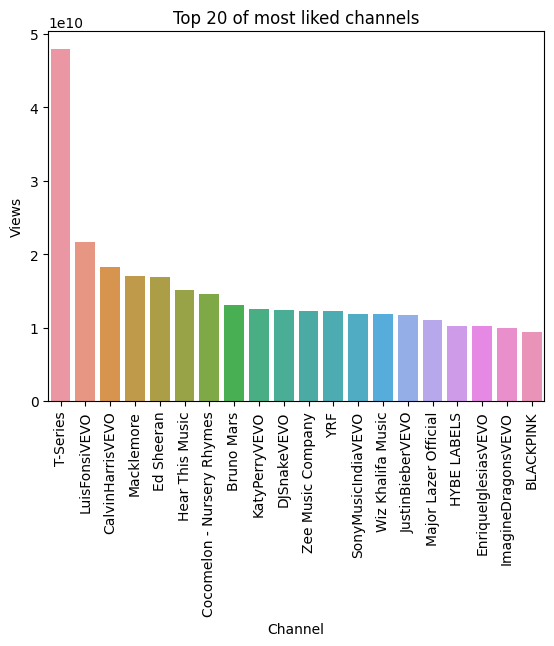

In [66]:
sns.barplot(channel_views, y = 'Views', x = 'Channel')
plt.title("Top 20 of most liked channels")
plt.xticks(rotation = 90)
plt.show()

#### Par likes

In [67]:
channel_likes = music.groupby("Channel").agg({"Likes" : "sum"}).reset_index().sort_values("Likes", ascending = False).head(20)
channel_likes

,Channel,Likes
4908,T-Series,348793719.0
2062,HYBE LABELS,262177152.0
498,BLACKPINK,131856733.0
3099,LuisFonsiVEVO,125771154.0
4508,SMTOWN,114711293.0
3223,Macklemore,112680815.0
1168,DJSnakeVEVO,108671915.0
624,BillieEilishVEVO,97020607.0
2965,LilNasXVEVO,96490325.0
1491,Ed Sheeran,95650055.0


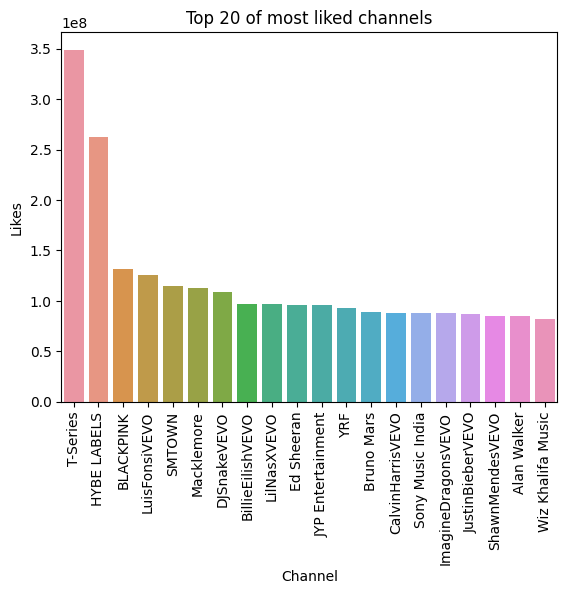

In [68]:
sns.barplot(channel_likes, y = 'Likes', x = 'Channel')
plt.title("Top 20 of most liked channels")
plt.xticks(rotation = 90)
plt.show()

T-Series est non seulement la chaîne la plus visionnée mais aussi la plus likée. Hybe Labels et Blackpink suivnet au classement.

#### Par commentaires

In [69]:
channel_comments = music.groupby("Channel").agg({"Comments" : "sum"}).reset_index().sort_values("Comments", ascending = False).head(20)
channel_comments

,Channel,Comments
2062,HYBE LABELS,58696191.0
498,BLACKPINK,19599405.0
2323,JYP Entertainment,19033260.0
4508,SMTOWN,14697781.0
4908,T-Series,9473860.0
3099,LuisFonsiVEVO,9262244.0
2588,JustinBieberVEVO,7719183.0
6365,officialpsy,7311608.0
3892,OneDirectionVEVO,6353959.0
3223,Macklemore,4567951.0


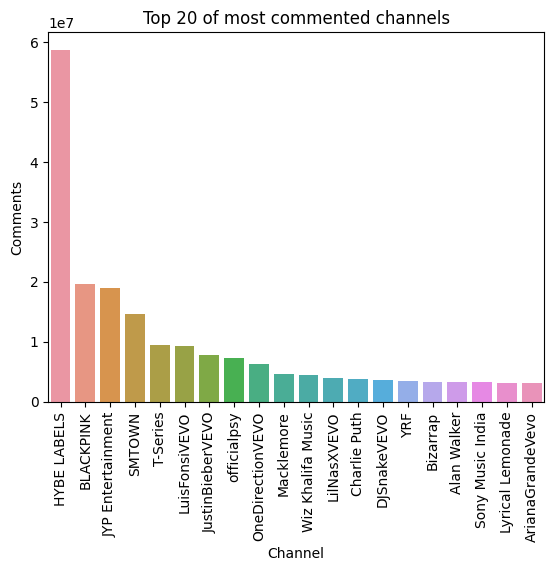

In [70]:
sns.barplot(channel_comments, y = 'Comments', x = 'Channel')
plt.title("Top 20 of most commented channels")
plt.xticks(rotation = 90)
plt.show()

Hybe Labels arrive en tête des chaînes les plus commentées, après avoir été élue 2ème chaîne le plus likée.

#### Par streams

In [71]:
channel_stream = music.groupby("Channel").agg({"Stream" : "sum"}).reset_index().sort_values("Stream", ascending = False).head(20)
channel_stream

,Channel,Stream
829,CalvinHarrisVEVO,2.147894e+10
1491,Ed Sheeran,1.806830e+10
910,ChainsmokersVEVO,1.712205e+10
4115,PostMaloneVEVO,1.565098e+10
532,Bad Bunny,1.559982e+10
2228,ImagineDragonsVEVO,1.504911e+10
3126,Lyrical Lemonade,1.494731e+10
744,Bruno Mars,1.426153e+10
5169,TheWeekndVEVO,1.333153e+10
4651,ShawnMendesVEVO,1.292545e+10


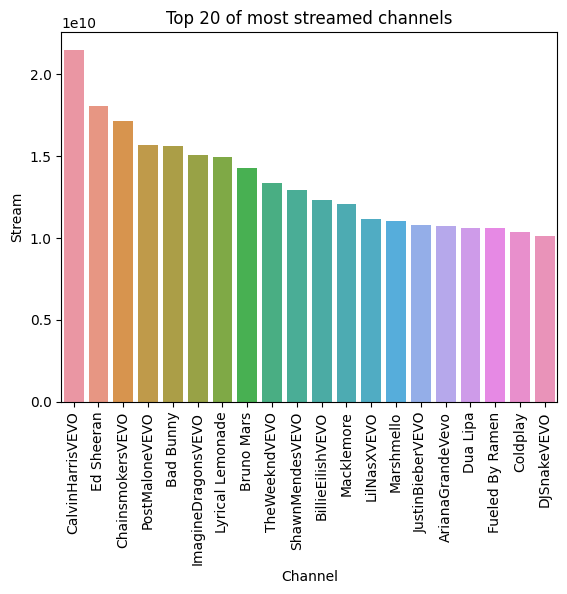

In [72]:
sns.barplot(channel_stream, y = 'Stream', x = 'Channel')
plt.title("Top 20 of most streamed channels")
plt.xticks(rotation = 90)
plt.show()

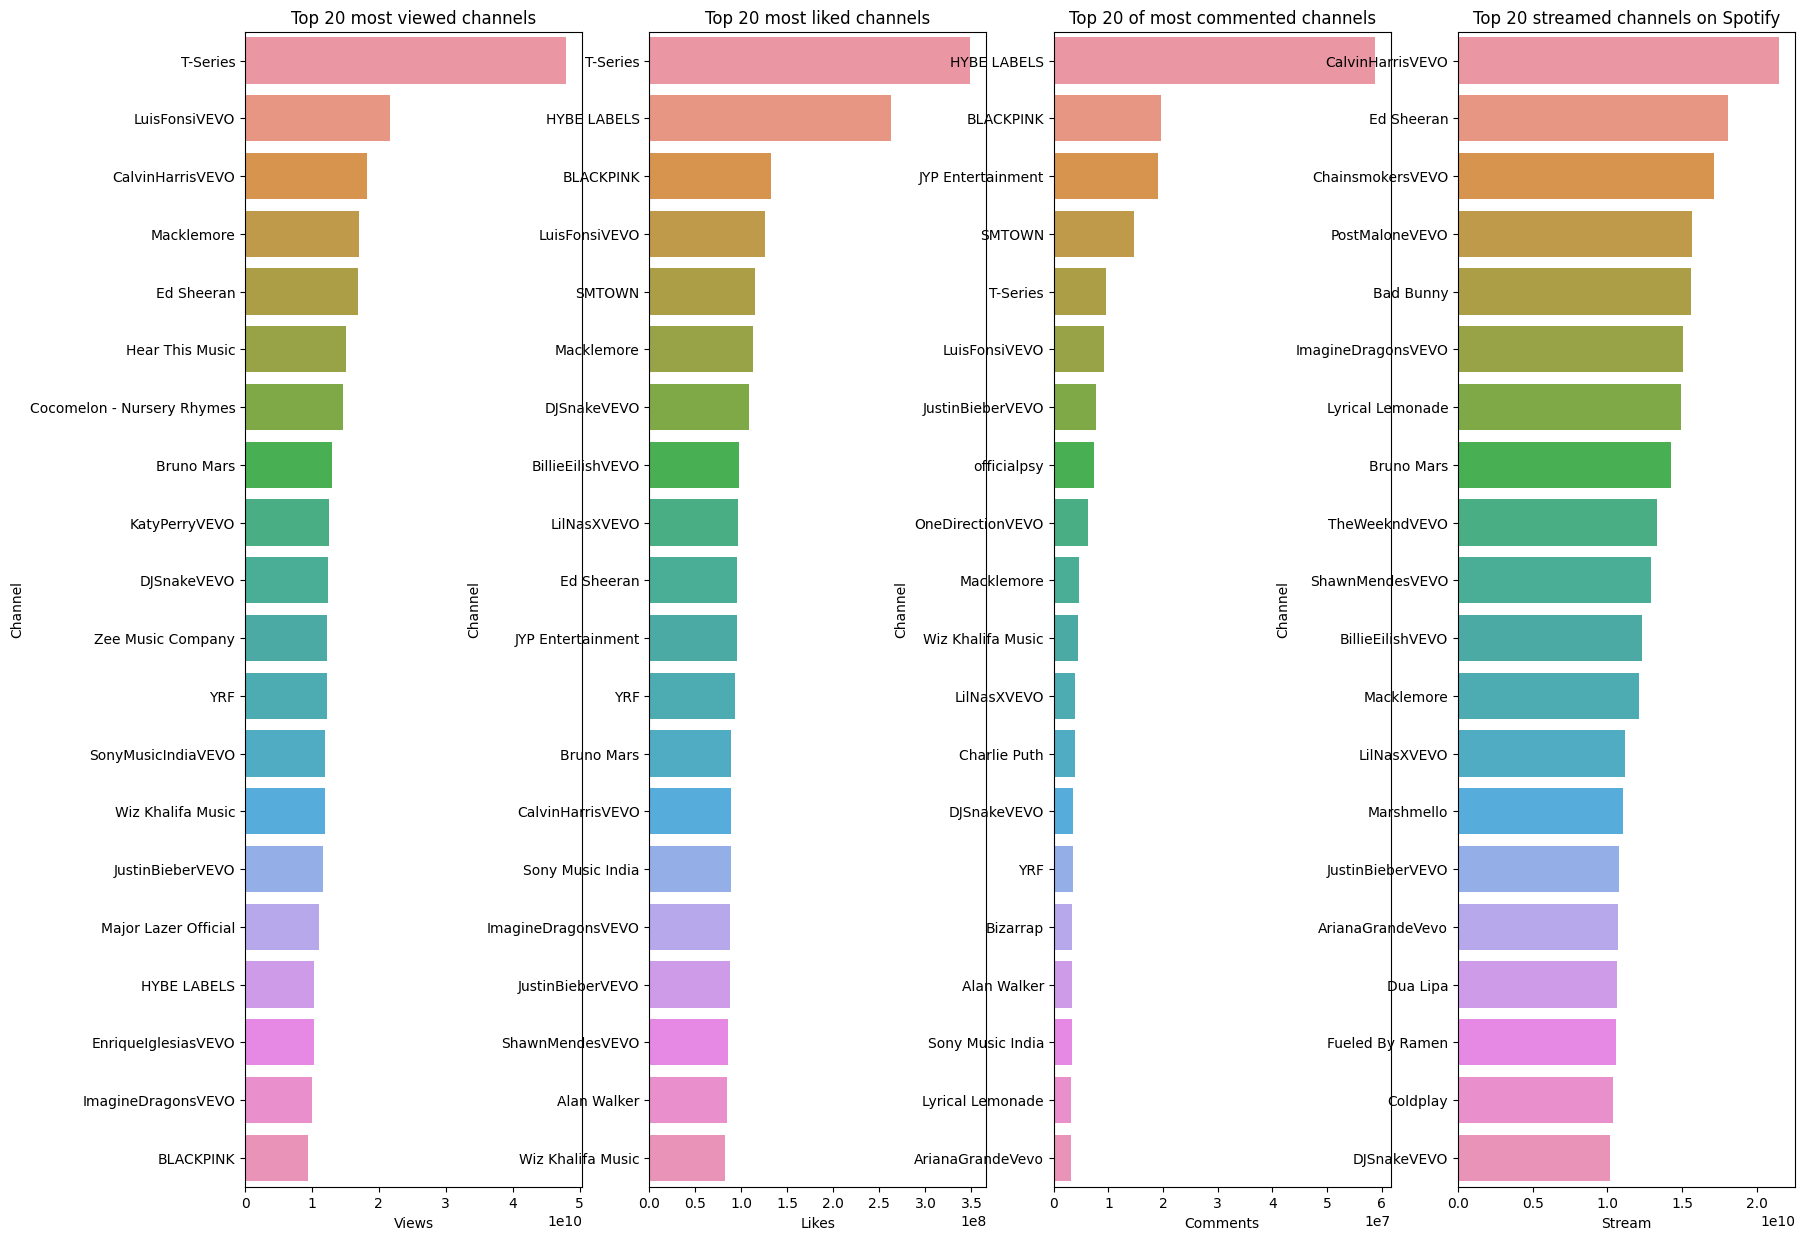

In [73]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 15))

sns.barplot(channel_views, x = "Views", y = "Channel", ax = axs[0])
axs[0].set_title("Top 20 most viewed channels")

sns.barplot(channel_likes, x = "Likes", y = "Channel", ax = axs[1])
axs[1].set_title("Top 20 most liked channels")

sns.barplot(channel_comments, x = "Comments", y = "Channel", ax = axs[2])
axs[2].set_title("Top 20 of most commented channels")

sns.barplot(channel_stream, y = "Channel", x = "Stream", ax = axs[3])
axs[3].set_title("Top 20 streamed channels on Spotify")

plt.show()

C'est la chaîne VEVO de Calvin Harris qui est la plus streamée. Suivi de Ed Sheeran et Chainsmonkers.
Beaucoup de chaînes VEVO sont présentes dans ce classement.

### Relations entre les mesures

Revenons-en au heatmap affiché plus haut et tentons de voir plus précisément les relations entre les mesures.

#### Energy and loundness

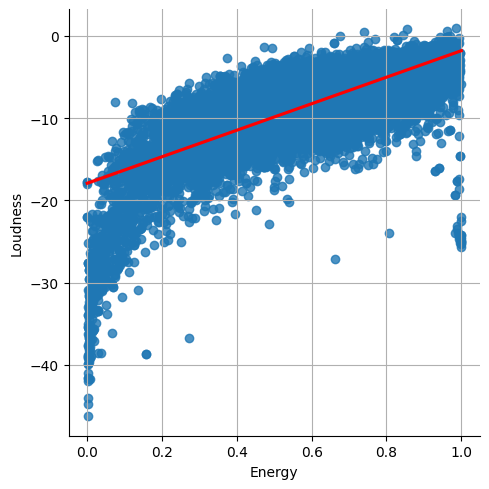

In [74]:
sns.lmplot(music, x = "Energy", y = "Loudness", line_kws = {"color" : "red"})
plt.grid(True)
plt.axis('tight')

plt.show()

Plus l'énergie augmente, plus le volume augmente aussi. Et inversement.

#### Acoustiness et Energy

<Figure size 1500x1000 with 0 Axes>

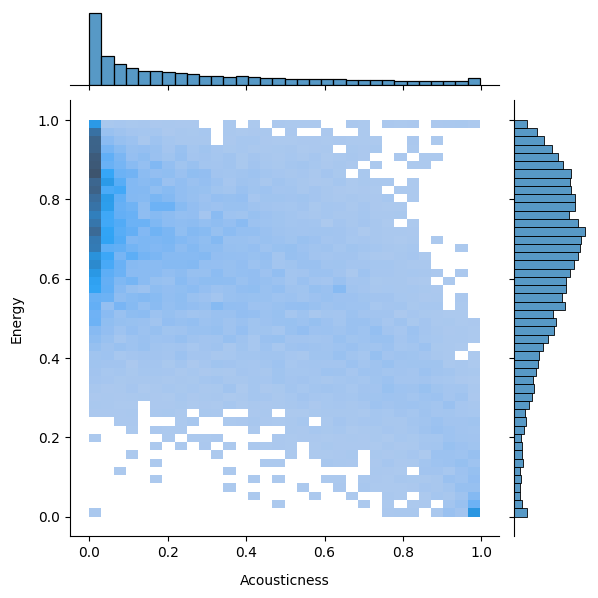

In [75]:
fig = plt.figure(figsize = (15,10))

sns.jointplot(music, x = "Acousticness", y = "Energy", kind = "hist")
plt.xlabel("Acousticness", labelpad = 10)
plt.ylabel("Energy", labelpad = 10)

plt.grid(False)
plt.axis('tight')

plt.show()


Une piste comportant une acoustique élevée sera probablement composée d'instruments acoustiques, comme la guitare, le piano ou les cordes.
Une piste à l'acoustique faible sera probablement composée d'instruments électroniques.

Une corrélation négative entre Energy (à gauche) et Acousticness indique qu'au fur et à mesure que l'énergie d'une piste augmente, l'acoustique de la piste diminue.

L'énergie d'une piste augmente, la quantité d'instruments acoustiques diminue, et inversement. 
La même tendance est observée pour l'intensité sonore (à droite).

L'acoustique a tendance à diminuer lorsque l'intensité sonore augmente.

#### Tempo et Speechiness

<Figure size 1500x1000 with 0 Axes>

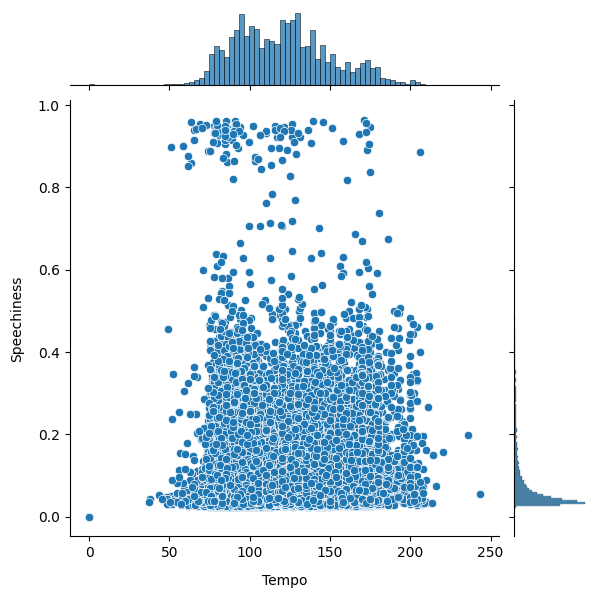

In [76]:
fig = plt.figure(figsize = (15,10))

sns.jointplot(music, x = "Tempo", y = "Speechiness", kind = "scatter")
plt.xlabel("Tempo", labelpad = 10)
plt.ylabel("Speechiness", labelpad = 10)

plt.grid(False)
plt.axis('tight')

plt.show()

Il existe une corrélation entre le niveau d'expression et le tempo, car les chansons au tempo plus rapide ont un niveau d'expression plus élevé et un niveau d'élocution plus élevé.

#### Tempo et Key

<Figure size 1500x1000 with 0 Axes>

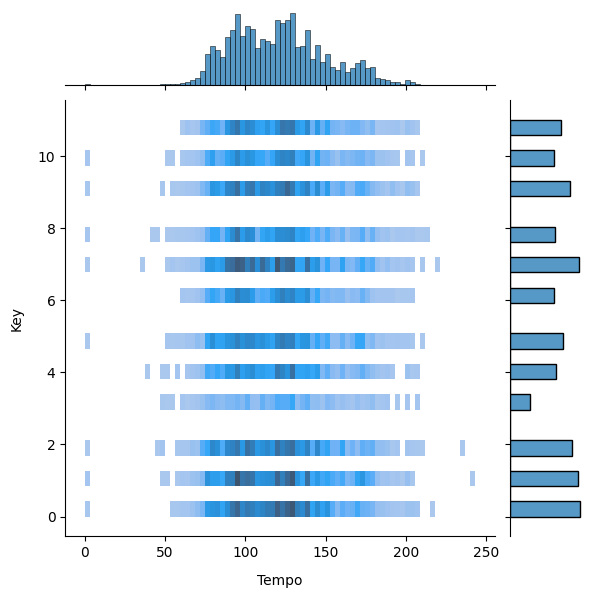

In [77]:
fig = plt.figure(figsize = (15,10))

sns.jointplot(music, x = "Tempo", y = "Key", kind = "hist")
plt.xlabel("Tempo", labelpad = 10)
plt.ylabel("Key", labelpad = 10)

plt.grid(False)
plt.axis('tight')

plt.show()

La tonalité d'une chanson peut influencer sa tonalité émotionnelle et peut également affecter son tempo perçu. Par exemple, une chanson dans une tonalité mineure peut être perçue comme plus lente qu'une chanson dans une tonalité majeure, même si le tempo réel est le même...

#### Instrumentalness et Speechiness

<Figure size 1500x1000 with 0 Axes>

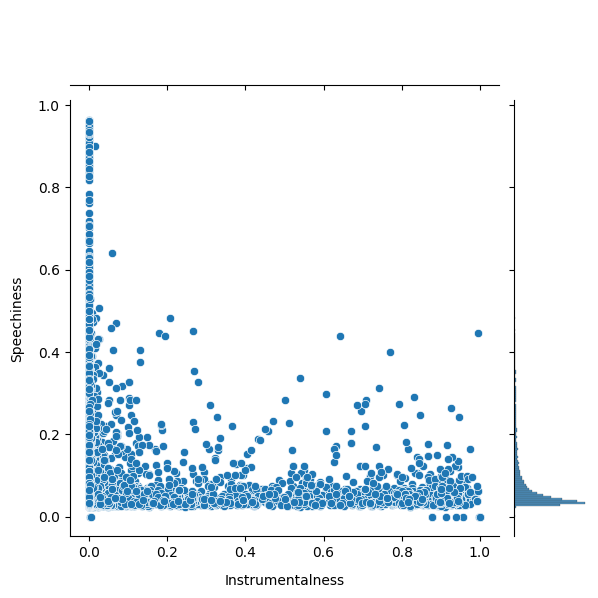

In [78]:
fig = plt.figure(figsize = (15,10))

sns.jointplot(music, x = "Instrumentalness", y = "Speechiness", kind = "scatter")
plt.xlabel("Instrumentalness", labelpad = 10)
plt.ylabel("Speechiness", labelpad = 10)

plt.grid(False)
plt.axis('tight')

plt.show()

Ces deux colonnes sont souvent inversement liées, car les chansons qui ont un niveau élevé d'expression orale ont souvent un niveau plus faible d'instrumentalité.

Le slam ou le rap, par exemple, a tendance à se concentrer sur les paroles et la voix, tandis que la musique instrumentale a tendance à se concentrer sur la musique elle-même.

#### Instrumentalness et Acousticness

<Figure size 1500x1000 with 0 Axes>

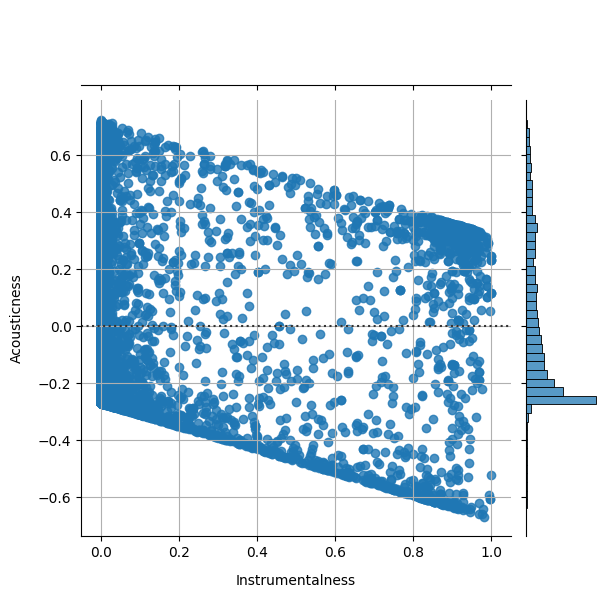

In [79]:
fig = plt.figure(figsize = (15,10))

sns.jointplot(music, x = "Instrumentalness", y = "Acousticness", kind = "resid")
plt.xlabel("Instrumentalness", labelpad = 10)
plt.ylabel("Acousticness", labelpad = 10)

plt.grid(True)
plt.axis('tight')

plt.show()

Ces deux colonnes sont souvent positivement corrélées, ce qui signifie que les chansons ayant un niveau élevé d'acoustique ont également tendance à avoir un niveau élevé d'instrumentalité.

Cela s'explique par le fait que les instruments acoustiques sont souvent utilisés pour créer de la musique instrumentale et que la musique instrumentale utilise souvent des instruments acoustiques.

#### Danceability et Energy

<Figure size 1500x1000 with 0 Axes>

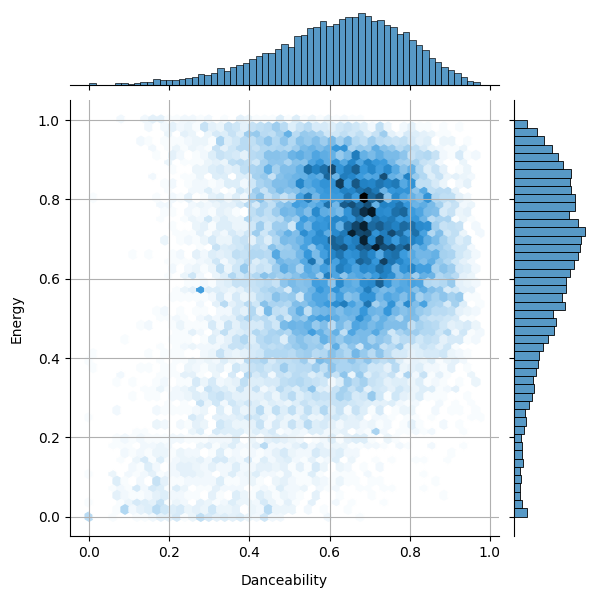

In [80]:
fig = plt.figure(figsize = (15,10))

sns.jointplot(music, x = "Danceability", y = "Energy", kind = "hex")
plt.xlabel("Danceability", labelpad = 10)
plt.ylabel("Energy", labelpad = 10)

plt.grid(True)
plt.axis('tight')

plt.show()

Ces deux colonnes peuvent être étroitement liées, car les chansons à forte capacité de danse ont souvent un niveau d'énergie élevé. En effet, les chansons qui se prêtent à la danse ont un rythme fort et constant qui encourage le mouvement, ce qui est souvent en corrélation avec un son très énergique.

#### Loudness et Energy

<Figure size 1500x1000 with 0 Axes>

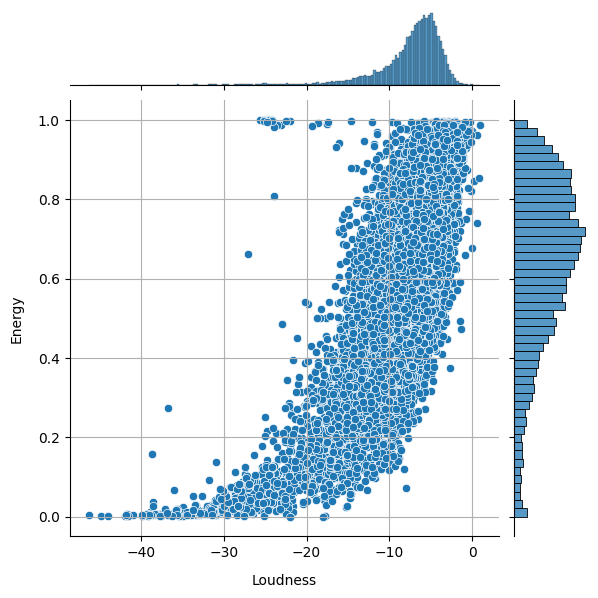

In [81]:
fig = plt.figure(figsize = (15,10))

sns.jointplot(music, x = "Loudness", y = "Energy", kind = "scatter")
plt.xlabel("Loudness", labelpad = 10)
plt.ylabel("Energy", labelpad = 10)

plt.grid(True)
plt.axis('tight')

plt.show()

L'intensité sonore et l'énergie sont deux caractéristiques audio couramment utilisées pour décrire la musique. L'intensité sonore fait référence au volume perçu d'une chanson, tandis que l'énergie fait référence à l'intensité ou au niveau d'activité d'une chanson. En général, les chansons à forte intensité sonore ont tendance à avoir une énergie élevée, car elles sont souvent plus intenses et dynamiques.

Toutefois, nous pouvons constater que certaines chansons ont une énergie élevée sans être particulièrement bruyantes, et inversement.

#### Valence et Energy

<Figure size 1500x1000 with 0 Axes>

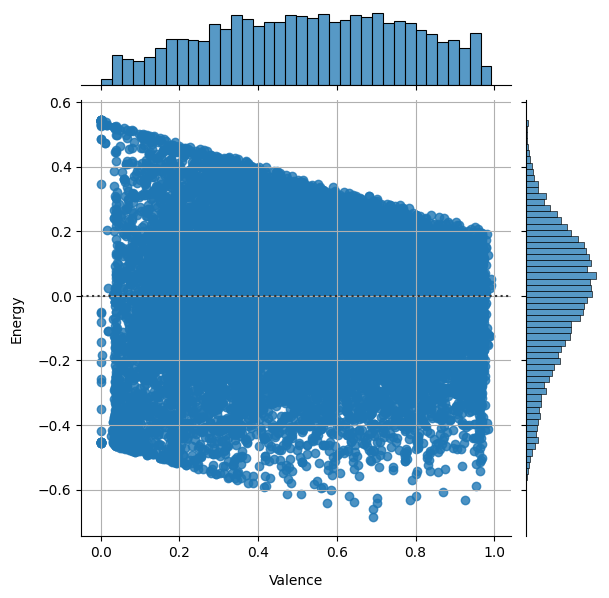

In [82]:
fig = plt.figure(figsize = (15,10))

sns.jointplot(music, x = "Valence", y = "Energy", kind = "resid")
plt.xlabel("Valence", labelpad = 10)
plt.ylabel("Energy", labelpad = 10)

plt.grid(True)
plt.axis('tight')

plt.show()

Il existe souvent une corrélation positive entre l'énergie et la valence, ce qui signifie que les chansons ayant un niveau d'énergie élevé ont tendance à avoir une tonalité émotionnelle plus positive.

Cela peut s'expliquer par le fait que les chansons à forte énergie ont souvent un son plus optimiste et plus vivant, associé à des émotions positives telles que le bonheur et l'excitation.

#### Views et Streams

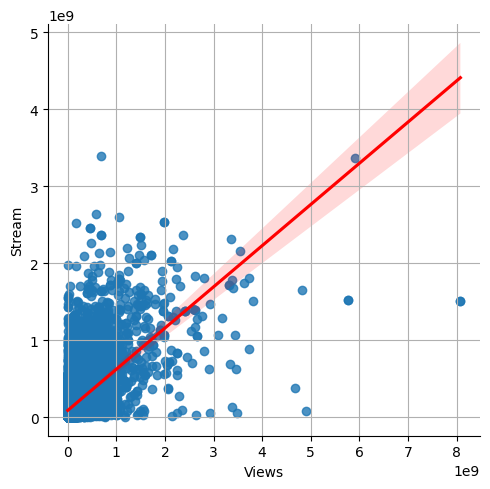

In [83]:
sns.lmplot(music, x = "Views", y = "Stream", line_kws = {"color" : "red"})
plt.grid(True)
plt.axis('tight')

plt.show()

#### Likes et Comments

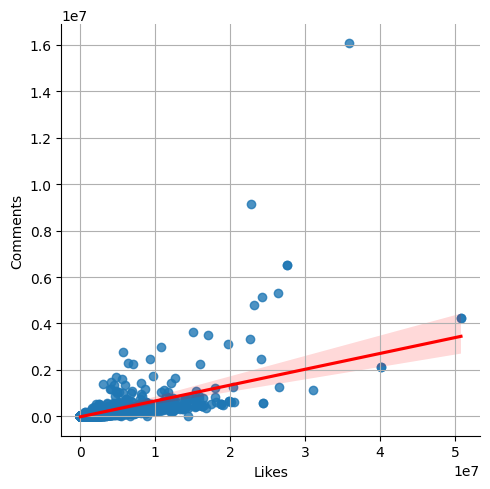

In [84]:
sns.lmplot(music, x = "Likes", y = "Comments", line_kws = {"color" : "red"})
plt.grid(True)
plt.axis('tight')

plt.show()

#### Likes et Views

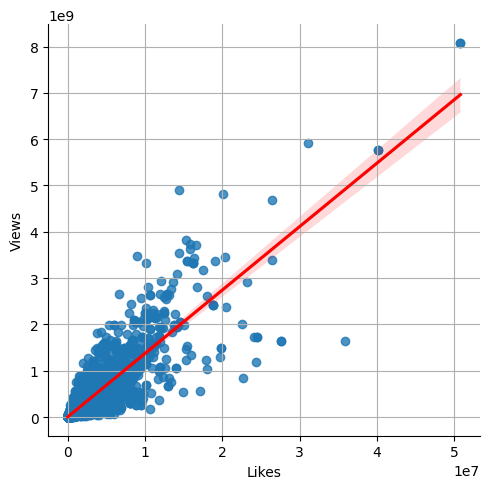

In [85]:
sns.lmplot(music, x = "Likes", y = "Views", line_kws = {"color" : "red"})
plt.grid(True)
plt.axis('tight')

plt.show()

## CONCLUSION

La musique n'est pas un simple passe-temps mais permet de lier un certain nombre de personnes à travers le monde, parfois de différentes cultures. Ce n'est pas pour rien si de nombreux chanteurs et de nombreuses chanteuses sont de véritables stars internationales.

Mais comment les gens choisissent-ils la musique qu'ils écoutent et et pourquoi sur telle ou telle plateforme ?

En effet, il existe une certaine différence entre les titres les plus populaires sur YouTube et celles sur Spotify. En effet, les chansons les plus populaires sur YouTube étant les plus vues mais pas nécessairement les plus écoutées sur Spotify. Pourquoi ? Effet de la promotion par les artistes et maisons de disques ? Les utilisateurs de ces deux plateformes qui ont des goûts différents ? Les algorithmes qui diffèrent ?

- Il existe également une corrélation positive entre le volume sonore et l'énergie d'un titre, ce qui indique que les titres les plus énergiques ont tendance à être plus forts. Ce qui est logique, puisque les perspnnes écoutent souvent de la musique pour améliorer leur humeur, exprimer leurs émotions ou tout simplement s'amuser ;
- Il existe également une corrélation négative entre l'énergie et l'acoustique, ce qui signifie que plus l'énergie d'un morceau augmente, plus la quantité d'instruments acoustiques diminue. Cela peut expliquer la raison pour laquelle la musique électronique est plus populaire que la que la musique acoustique lorsqu'il s'agit de morceaux très énergiques, par exemple.

Enfin, nous avons constaté que les albums sont beaucoup plus populaires que les singles et compilations. Les personnes aiment écouter plusieurs morceaux du même artiste plutôt que de se contenter d'écouter un catalogue de morceaux simples d'artistes différents. En effet, en général, un album a un contete et/ou raconte une histoire : il s'agit de l'expression artistique voulue par l'artiste. 



## MACHINE LEARNING

### Analyse de régression linéaire

Prédire le nombre de Likes / Views / Comments

In [86]:
music_dropna = music.dropna()

In [87]:
metrics = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence','Tempo']

In [88]:
def l_regression(metrics, label):
    
    print("Regression with the target : ", label)
    print()
    X = music_dropna[metrics]
    y = music_dropna[label]
    
    # Création d'une instance de la classe StandardScaler pour la mise à l'échelle des données
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    # Création d'une instance de la classe LinearRegression pour le modèle
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error : {mse:.2f}")
    print(f"R-squared : {r2:.2f}")
    print()
    print(f"Coefficients : {model.coef_}")
    print(f"Intercept : {model.intercept_}")

In [89]:
lreg_views = l_regression(metrics,'Views')
lreg_likes = l_regression(metrics,'Likes')
lreg_comments = l_regression(metrics,'Comments')

Regression with the target :  Views

Mean Squared Error : 64141322743208040.00
R-squared : 0.02

Coefficients : [ 1.16707172e+08  4.04963512e+07 -8.09668862e+07 -2.57528834e+07
 -7.76253467e+07 -4.46173862e+07 -2.25118375e+07 -4.59150285e+04]
Intercept : 44930604.307965
Regression with the target :  Likes

Mean Squared Error : 2353372472776.66
R-squared : 0.02

Coefficients : [ 1.01905342e+06  2.30132138e+05 -2.61548197e+05 -2.31566411e+05
 -4.98699119e+05 -3.13643426e+05 -4.21394528e+05  7.52757297e+01]
Intercept : 301498.0362987926
Regression with the target :  Comments

Mean Squared Error : 13965685110.66
R-squared : 0.01

Coefficients : [ 3.90990612e+04  1.73278265e+04 -4.08644257e+03 -2.36092060e+04
 -1.18449823e+04 -2.37733116e+04 -9.50210833e+03  2.07542712e+01]
Intercept : 8648.50245277728


Les prédictions du modèle ne sont pas du tout exactes !